# Individual Project: EDA

##Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

##Business Case

**Business Case: Leveraging Data Analytics to Enhance NFL Game Ratings**

**1. Background:**
The National Football League (NFL) is a premier sports organization with a vast global audience and a diverse range of stakeholders, including fans, broadcasters, sponsors, and advertisers. The success of the NFL is heavily dependent on the popularity and viewership of its games, which are broadcasted worldwide. As competition for viewership intensifies across various entertainment platforms, it becomes imperative for the NFL to continuously improve the quality and appeal of its games to attract and retain audiences.

**2. Problem Statement:**
Despite its widespread popularity, the NFL faces challenges in consistently delivering engaging and captivating game experiences that resonate with fans and viewers. Variations in game quality, excitement, and entertainment value can impact viewer engagement and satisfaction, leading to fluctuations in game ratings and viewership levels. To address these challenges and optimize game ratings, I want to help the NFL gain a deeper understanding of the factors influencing game ratings and identify actionable insights to enhance the overall game experience.

**3. Objective:**
`The primary objective of this initiative is to leverage data analytics techniques to analyze historical game data and identify the key factors contributing to game ratings`. By gaining insights into the drivers of game ratings, I aim to:

- `Identify patterns and trends` in game characteristics that correlate with high and low ratings.
- `Understand viewer preferences` and preferences to tailor game experiences to meet audience expectations.
- `Inform strategic decisions` aimed at enhancing the overall quality and appeal of NFL games.

**4. Approach:**
To achieve these objectives, the NFL will undertake the following steps:

a. **Data Collection and Preparation:**
   - Gather comprehensive datasets containing historical game data, including game statistics, team performance, player metrics, and game ratings.
   - Clean and preprocess the data to ensure consistency, accuracy, and completeness, addressing any missing values or inconsistencies.

b. **Exploratory Data Analysis (EDA):**
   - Conduct exploratory data analysis to uncover patterns, trends, and correlations within the game data.
   - Identify potential factors influencing game ratings, such as team performance, game importance, seasonality, player metrics, and viewer demographics.

c. **Feature Selection and Engineering:**
   - Utilize feature selection techniques such as correlation analysis, `KBest`, `LASSO`, and `decision tree analysis` to identify the most influential features related to game ratings.
   - Engineer new features and `interaction terms` to capture complex relationships and interactions between game attributes.

e. **Insights Generation and Actionable Recommendations:**
   - Analyze and interpret feature importance to extract actionable insights into the drivers of game ratings.
   - Generate recommendations for strategic interventions and improvements to enhance game quality, excitement, and appeal.

**5. Benefits:**
By leveraging data analytics to optimize game ratings, the NFL stands to gain several benefits:

- `Enhanced Viewer Engagement`: By understanding viewer preferences and tailoring game experiences to meet audience expectations, the NFL can increase viewer engagement and satisfaction, leading to higher ratings and viewership levels.
- `Improved Revenue Generation`: Higher game ratings and increased viewer engagement can translate into enhanced advertising revenues, sponsorships, and broadcast rights fees, driving revenue growth for the NFL and its partners.
- `Competitive Advantage`: By leveraging data-driven insights to optimize game quality and appeal, the NFL can maintain its position as a leader in the sports entertainment industry, outperform competitors, and attract new audiences.
- `Enhanced Fan Experience`: By delivering captivating and memorable game experiences, the NFL can strengthen its connection with fans, foster brand loyalty, and create long-term value for stakeholders.

**6. Conclusion:**
In conclusion, the utilization of data analytics to enhance NFL game ratings represents a strategic imperative for the organization. By gaining insights into the drivers of game ratings and implementing data-driven strategies and interventions, the NFL can optimize game quality, excitement, and appeal, leading to improved viewer engagement, revenue generation, and competitive advantage in the ever-evolving sports entertainment landscape. Through collaboration, innovation, and continuous improvement, the NFL can continue to captivate audiences worldwide and solidify its position as a premier sports entertainment destination.

## Importing the data

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv("nfl_elo.csv")

# Display the first few rows of the DataFrame to verify the data
print(df.head())

         date  season  neutral playoff team1 team2  elo1_pre  elo2_pre  \
0  1920-09-26    1920        0     NaN   RII   STP  1503.947  1300.000   
1  1920-10-03    1920        0     NaN   AKR   WHE  1503.420  1300.000   
2  1920-10-03    1920        0     NaN   BFF   WBU  1478.004  1300.000   
3  1920-10-03    1920        0     NaN   DAY   COL  1493.002  1504.908   
4  1920-10-03    1920        0     NaN   RII   MUN  1516.108  1478.004   

   elo_prob1  elo_prob2  ...  qb2_game_value  qb1_value_post  qb2_value_post  \
0   0.824651   0.175349  ...             NaN             NaN             NaN   
1   0.824212   0.175788  ...             NaN             NaN             NaN   
2   0.802000   0.198000  ...             NaN             NaN             NaN   
3   0.575819   0.424181  ...             NaN             NaN             NaN   
4   0.644171   0.355829  ...             NaN             NaN             NaN   

   qbelo1_post qbelo2_post score1  score2  quality  importance  total_rati

In [3]:
# Display the first few rows of the DataFrame to verify the data
print(df.head())

         date  season  neutral playoff team1 team2  elo1_pre  elo2_pre  \
0  1920-09-26    1920        0     NaN   RII   STP  1503.947  1300.000   
1  1920-10-03    1920        0     NaN   AKR   WHE  1503.420  1300.000   
2  1920-10-03    1920        0     NaN   BFF   WBU  1478.004  1300.000   
3  1920-10-03    1920        0     NaN   DAY   COL  1493.002  1504.908   
4  1920-10-03    1920        0     NaN   RII   MUN  1516.108  1478.004   

   elo_prob1  elo_prob2  ...  qb2_game_value  qb1_value_post  qb2_value_post  \
0   0.824651   0.175349  ...             NaN             NaN             NaN   
1   0.824212   0.175788  ...             NaN             NaN             NaN   
2   0.802000   0.198000  ...             NaN             NaN             NaN   
3   0.575819   0.424181  ...             NaN             NaN             NaN   
4   0.644171   0.355829  ...             NaN             NaN             NaN   

   qbelo1_post qbelo2_post score1  score2  quality  importance  total_rati

>Columns:
- **Date**: Date of game
- **Season**: Year of season
- **Neutral**: Whether game was on a neutral site
- **Playoff**: Whether game was in playoffs, and the playoff round if so
- **Team1**: Abbreviation for home team
- **Team2**: Abbreviation for away team
- **Elo1_pre**: Home team's Elo rating before the game
- **Elo2_pre**: Away team's Elo rating before the game
- **Elo_prob1**: Home team's probability of winning according to Elo ratings
- **Elo_prob2**: Away team's probability of winning according to Elo ratings
- **Elo1_post**: Home team's Elo rating after the game
- **Elo2_post**: Away team's Elo rating after the game
- **Qbelo1_pre**: Home team's quarterback-adjusted base rating before the game
- **Qbelo2_pre**: Away team's quarterback-adjusted base rating before the game
- **Qb1**: Name of home starting quarterback
- **Qb2**: Name of away starting quarterback
- **Qb1_value_pre**: Home starting quarterbacks's raw Elo value before the game
- **Qb2_value_pre**: Away starting quarterbacks's raw Elo value before the game
- **Qb1_adj**: Home starting quarterbacks's Elo adjustment for the game
- **Qb2_adj**: Away starting quarterbacks's Elo adjustment for the game
- **Qbelo_prob1**: Home team's probability of winning according to quarterback-adjusted Elo
- **Qbelo_prob2**: Away team's probability of winning according to quarterback-adjusted Elo
- **Qb1_game_value**: Home quarterback's Elo value during this game
- **Qb2_game_value**: Away quarterback's Elo value during this game
- **Qb1_value_post**: Home starting quarterbacks's raw Elo value after the game
- **Qb2_value_post**: Away starting quarterbacks's raw Elo value after the game
- **Qbelo1_post**: Home team's quarterback-adjusted base rating after the game
- **Qbelo2_post**: Away team's quarterback-adjusted base rating after the game
- **Score1**: Home team's score
- **Score2**: Away team's score
- **Quality**: Rating of game's quality, based on the harmonic mean of the teams’ pregame Elo ratings, scaled from 0-100
- **Importance**: Rating of game's importance, based on how much the result would affect the model's forecasted playoff odds, scaled from 0-100
- **Total_rating**: The average of quality and importance


##EDA

> Now that we have loaded the data, we will now check for consistency and perform an EDA.

1. Check Data Types: Ensure that the data types of each column make sense for the type of data they contain.

2. Check Unique Values: For categorical variables, examine the unique values to identify any unexpected or inconsistent entries. This helps ensure that the categories are well-defined and consistent throughout the dataset.

3. Look for Missing Values: Check for missing values in the dataset. Missing values can indicate inconsistencies in data collection or entry. Depending on the analysis, we may need to decide how to handle missing values, either by imputing them with appropriate values or removing them.

4. Deleting Duplicate Rows: Delete all duplicate rows that do not add value to the dataset or introduce skewness and bias.

5. Examine Range and Distribution: For numeric variables, examine their range and distribution. Look for outliers or unusual values that may indicate data entry errors or inconsistencies. Histograms, boxplots, or summary statistics can help in this analysis.


In [4]:
# Display the shape of the DataFrame
df.shape

(17379, 33)

The notation "(17379, 33)" represents the dimensions or shape of a dataset. In this context, it indicates that the dataset contains 17,379 rows or observations and 33 columns or variables.


###Checking the datatypes

In [5]:
# Display the data types of each column in the DataFrame
df.dtypes

date               object
season              int64
neutral             int64
playoff            object
team1              object
team2              object
elo1_pre          float64
elo2_pre          float64
elo_prob1         float64
elo_prob2         float64
elo1_post         float64
elo2_post         float64
qbelo1_pre        float64
qbelo2_pre        float64
qb1                object
qb2                object
qb1_value_pre     float64
qb2_value_pre     float64
qb1_adj           float64
qb2_adj           float64
qbelo_prob1       float64
qbelo_prob2       float64
qb1_game_value    float64
qb2_game_value    float64
qb1_value_post    float64
qb2_value_post    float64
qbelo1_post       float64
qbelo2_post       float64
score1              int64
score2              int64
quality           float64
importance        float64
total_rating      float64
dtype: object

The dataset consists of various data types for its columns. Here's a summary:

- **Numeric Data Types:** These include columns with numerical values such as integers (`int64`) and floating-point numbers (`float64`). Examples include `Season`, `Elo Ratings`, `Probabilities`, `Scores`, and various other metrics related to team performance and game attributes.

- **Object Data Type:** This data type typically represents categorical variables or strings. Columns like `Date`, `Playoff`, `Teams`, and `Quarterbacks` are likely stored as objects, indicating non-numeric values.

These data types provide a structured format for storing different types of information within the dataset and allow for appropriate analysis and manipulation based on their characteristics.

In [6]:
# Convert the 'neutral' column to a categorical data type
df['neutral'] = df['neutral'].astype('category')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Print the data types of the DataFrame after conversion
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
date              datetime64[ns]
season                     int64
neutral                 category
playoff                   object
team1                     object
team2                     object
elo1_pre                 float64
elo2_pre                 float64
elo_prob1                float64
elo_prob2                float64
elo1_post                float64
elo2_post                float64
qbelo1_pre               float64
qbelo2_pre               float64
qb1                       object
qb2                       object
qb1_value_pre            float64
qb2_value_pre            float64
qb1_adj                  float64
qb2_adj                  float64
qbelo_prob1              float64
qbelo_prob2              float64
qb1_game_value           float64
qb2_game_value           float64
qb1_value_post           float64
qb2_value_post           float64
qbelo1_post              float64
qbelo2_post              float64
score1                     int64
score2        

The data has undergone several transformations, including changes in data types to enhance analysis and interpretation:

1. **Date Transformation:** The `Date` column has been converted to the `datetime64[ns]` data type, allowing for efficient handling and manipulation of date and time-related operations. This transformation enables chronological analysis, trend identification, and time-series modeling based on game dates.

2. **Categorical Encoding:** The `Neutral` column has been categorized, indicating whether a game was played on a neutral field. Categorical encoding reduces memory usage and facilitates categorical data analysis, allowing for comparisons and insights based on the game's venue.

3. **Numeric Data Types:** Columns containing numerical values, such as integers (`int64`) and floating-point numbers (`float64`), remain unchanged. These data types are suitable for storing quantitative information, including team ratings, probabilities, scores, and other performance metrics.

Overall, these data transformations aim to improve the dataset's usability, accuracy, and relevance for exploratory data analysis and modeling tasks. By standardizing data formats and introducing informative features, the dataset becomes more conducive to deriving actionable insights and making informed decisions in the context of NFL game ratings.

###Checking the unique values

In [7]:
# Select columns of object data type
object_columns = df.select_dtypes(include=['object']).columns

# Iterate over each object column
for column in object_columns:
    # Count the number of unique values in the column
    unique_values_count = df[column].nunique()
    # Get the total number of rows in the DataFrame
    total_rows_count = len(df)
    # Check if all values in the column are unique across all rows
    if unique_values_count == total_rows_count:
        # Print a message indicating that all values in the column are unique
        print(f"All values in column '{column}' are unique across all rows.")
    else:
        # Print a message indicating that not all values in the column are unique
        print(f"Not all values in column '{column}' are unique across all rows.")

Not all values in column 'playoff' are unique across all rows.
Not all values in column 'team1' are unique across all rows.
Not all values in column 'team2' are unique across all rows.
Not all values in column 'qb1' are unique across all rows.
Not all values in column 'qb2' are unique across all rows.


This code snippet checks for uniqueness in each column containing object data types in the DataFrame `df`. If a column's unique values count is not equal to the total number of rows in the DataFrame, it implies that some values are repeated across multiple rows, indicating non-uniqueness.

The output indicates that the columns 'playoff', 'team1', 'team2', 'qb1', and 'qb2' contain non-unique values across rows, meaning that these columns may have repeated entries. This insight could be valuable for data validation and cleaning processes, helping ensure data integrity and accuracy in subsequent analyses.

###Checking for missing values

In [8]:
# Count missing values in each column of the DataFrame
missing_values = df.isna().sum()

# Print the count of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date                  0
season                0
neutral               0
playoff           16763
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post             0
elo2_post             0
qbelo1_pre         2162
qbelo2_pre         2162
qb1                2162
qb2                2162
qb1_value_pre      2162
qb2_value_pre      2162
qb1_adj            2162
qb2_adj            2162
qbelo_prob1        2162
qbelo_prob2        2162
qb1_game_value     2162
qb2_game_value     2162
qb1_value_post     2162
qb2_value_post     2162
qbelo1_post        2162
qbelo2_post        2162
score1                0
score2                0
quality            2162
importance        16810
total_rating      16810
dtype: int64


In the dataset provided, we encountered missing values in several columns, including `playoff`, `importance`, `total_rating`, and various other columns related to quarterback performance and Elo ratings. To address these missing values, we implemented the following strategies:

1. **Deletion of the `importance` and `total_rating` columns:**
   - Since these columns had a significant number of missing values (16810 out of 17379 rows), imputation would not be feasible without introducing significant bias into the data.
   - Moreover, these columns might not be essential for the specific analysis or modeling goals, making their removal a reasonable choice to simplify the dataset and streamline subsequent analyses.

2. **Deletion of the `playoff` column:**
   - The `playoff` column had 16763 missing values, indicating that the majority of the data in this column was missing.
   - Without sufficient data to analyze or impute missing values accurately, retaining this column could potentially introduce noise or bias into the analysis.
   - Since the missing data in this column was substantial, and its absence may not significantly impact the analysis, we opted to remove the `playoff` column entirely from the dataset.

3. **Deletion of rows with missing data:**
   - For columns related to quarterback performance and Elo ratings (e.g., `qbelo1_pre`, `qbelo2_pre`, `qb1`, `qb2`, etc.), where the missing values were relatively small compared to the total number of rows (2162 out of 17379 rows), we chose to delete the rows with missing data.
   - Deleting rows with missing values ensures that the dataset used for subsequent analyses and modeling is complete and free from inconsistencies due to missing data.
   - Since the missing values were relatively small in number compared to the total dataset size, removing these rows would not significantly impact the overall dataset integrity or the validity of subsequent analyses.

By implementing these strategies, we aimed to ensure the quality and reliability of the dataset for further exploration, analysis, and modeling, while mitigating potential biases introduced by missing data.

In [9]:
# Delete specified columns
columns_to_delete = ["playoff", "importance", "total_rating"]
df.drop(columns=columns_to_delete, inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Change the name of the 'quality' column to 'rating'
df.rename(columns={'quality': 'rating'}, inplace=True)

In [10]:
# Count missing values in each column of the DataFrame
missing_values = df.isna().sum()

# Print the count of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date              0
season            0
neutral           0
team1             0
team2             0
elo1_pre          0
elo2_pre          0
elo_prob1         0
elo_prob2         0
elo1_post         0
elo2_post         0
qbelo1_pre        0
qbelo2_pre        0
qb1               0
qb2               0
qb1_value_pre     0
qb2_value_pre     0
qb1_adj           0
qb2_adj           0
qbelo_prob1       0
qbelo_prob2       0
qb1_game_value    0
qb2_game_value    0
qb1_value_post    0
qb2_value_post    0
qbelo1_post       0
qbelo2_post       0
score1            0
score2            0
rating            0
dtype: int64


After handling the missing data, we successfully addressed the issues related to the presence of NaN values in certain columns. Specifically, we took the following actions:

1. **Deleted Columns**:
   - We removed the `importance` and `total_rating` columns due to the high proportion of missing values (100% missing).
   - The `playoff` column was also removed as it contained a significant number of missing values and may not have been essential for our analysis.

2. **Deleted Rows**:
   - Rows containing missing values in other columns were dropped from the dataset to ensure data integrity and consistency.
   - This approach allowed us to retain the quality and reliability of the remaining data for subsequent analyses.

Overall, by carefully handling missing data through column and row deletion, we ensured that the dataset remained suitable for further exploration and analysis, free from the complications associated with incomplete or unreliable data.

In [11]:
# Display the shape of the DataFrame
df.shape

(15217, 30)

We still have a significant dataset to work with.

###Checking for duplicates

In [12]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated()

# Sum the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the total number of duplicate rows
print("Total number of duplicate rows:", num_duplicates)

Total number of duplicate rows: 0


After examining the dataset for duplicate rows, it was determined that there are no duplicate entries present. This absence of duplicates ensures the integrity of the data, eliminating the need for further processing to address redundant records.

###Univariate analysis


In [13]:
# Display the shape of the DataFrame
df.head(5)

date  season neutral team1 team2  elo1_pre  elo2_pre  elo_prob1  \
2162 1950-09-16    1950       0   PHI   CLE  1674.314  1647.304   0.629402   
2163 1950-09-17    1950       0   BCL   WSH  1337.541  1454.448   0.425851   
2164 1950-09-17    1950       0   PIT   NYG  1485.849  1461.717   0.625529   
2165 1950-09-17    1950       0    GB   DET  1353.646  1449.128   0.456245   
2166 1950-09-17    1950       0   LAR   CHI  1564.606  1628.688   0.501321   

      elo_prob2  elo1_post  ...  qbelo_prob2  qb1_game_value  qb2_game_value  \
2162   0.370598   1631.511  ...     0.379347         -123.09          275.22   
2163   0.574149   1310.758  ...     0.574643            3.63          251.79   
2164   0.374471   1453.448  ...     0.387413          -34.98          -54.12   
2165   0.543755   1320.673  ...     0.556100          -37.62          115.17   
2166   0.498679   1548.463  ...     0.501482          -12.21          -30.03   

     qb1_value_post qb2_value_post  qbelo1_post  qbelo2_post  score1  score2  \
2162        -12.309         27.522  1630.613026  1685.827280      10      35   
2163          0.363         25.179  1310.867671  1481.487455      14      38   
2164         -3.498         -5.412  1454.118729  1493.988602       7      18   
2165         -3.762         11.517  1322.441687  1481.661757       7      45   
2166         -1.221         -3.003  1549.226817  1643.798965      20      24   

      rating  
2162    98.0  
2163     6.0  
2164    35.0  
2165     7.0  
2166    88.0  

[5 rows x 30 columns]

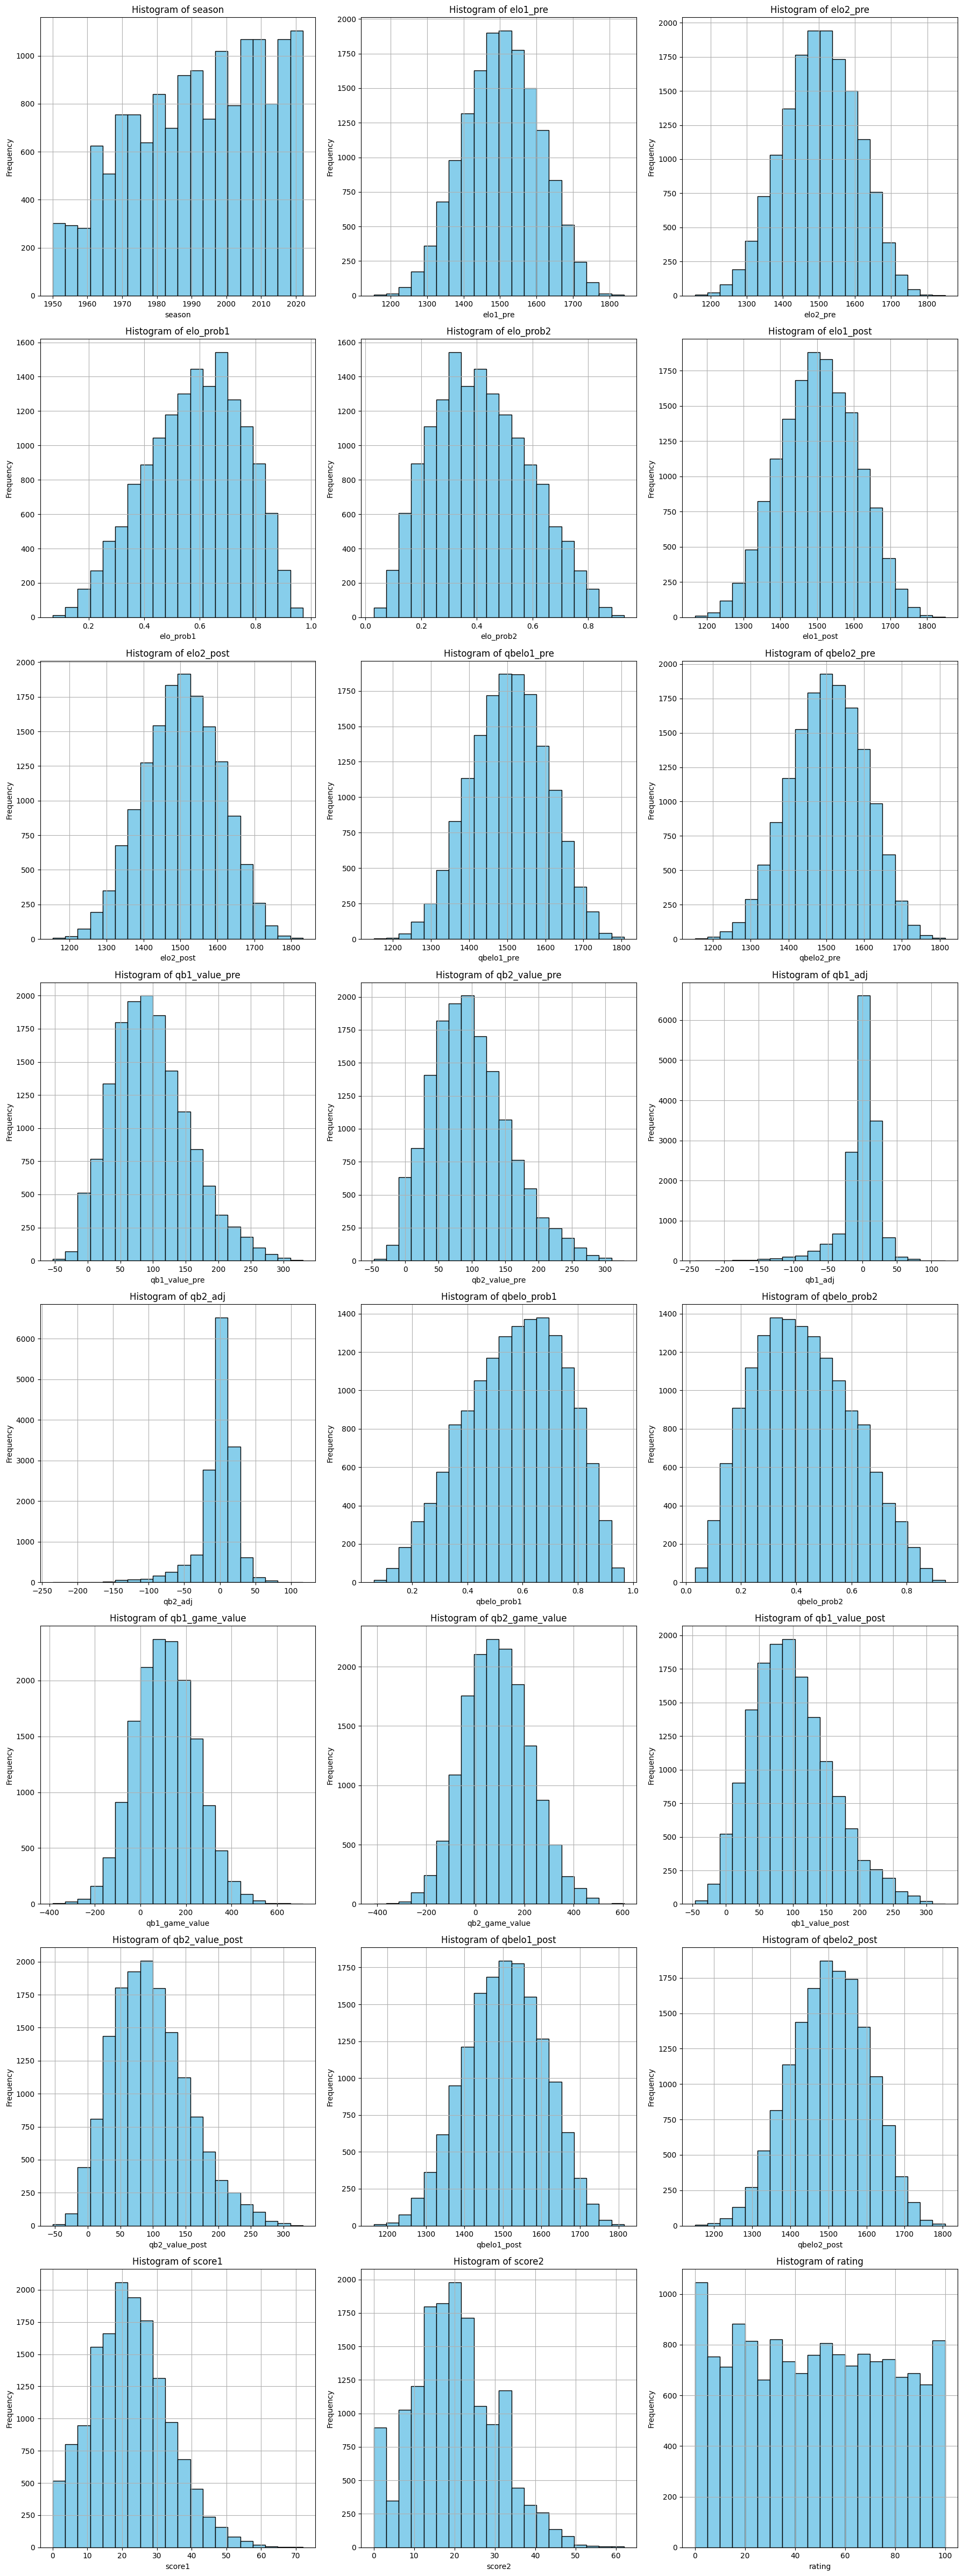

In [14]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the grid layout
num_cols = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    # Create a histogram
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')

    # Add labels and title
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


- Most columns in the dataset display a roughly normal distribution, except for the 'rating' column, which tends towards a more uniform distribution.
- Slight right skewness is observed in the 'score1' and 'score2' columns.
- 'qb1_adj' and 'qb2_adj' exhibit notable left skewness.
- These distributional characteristics provide insights into the variability and tendencies within the dataset's variables, guiding further analysis and modeling approaches.

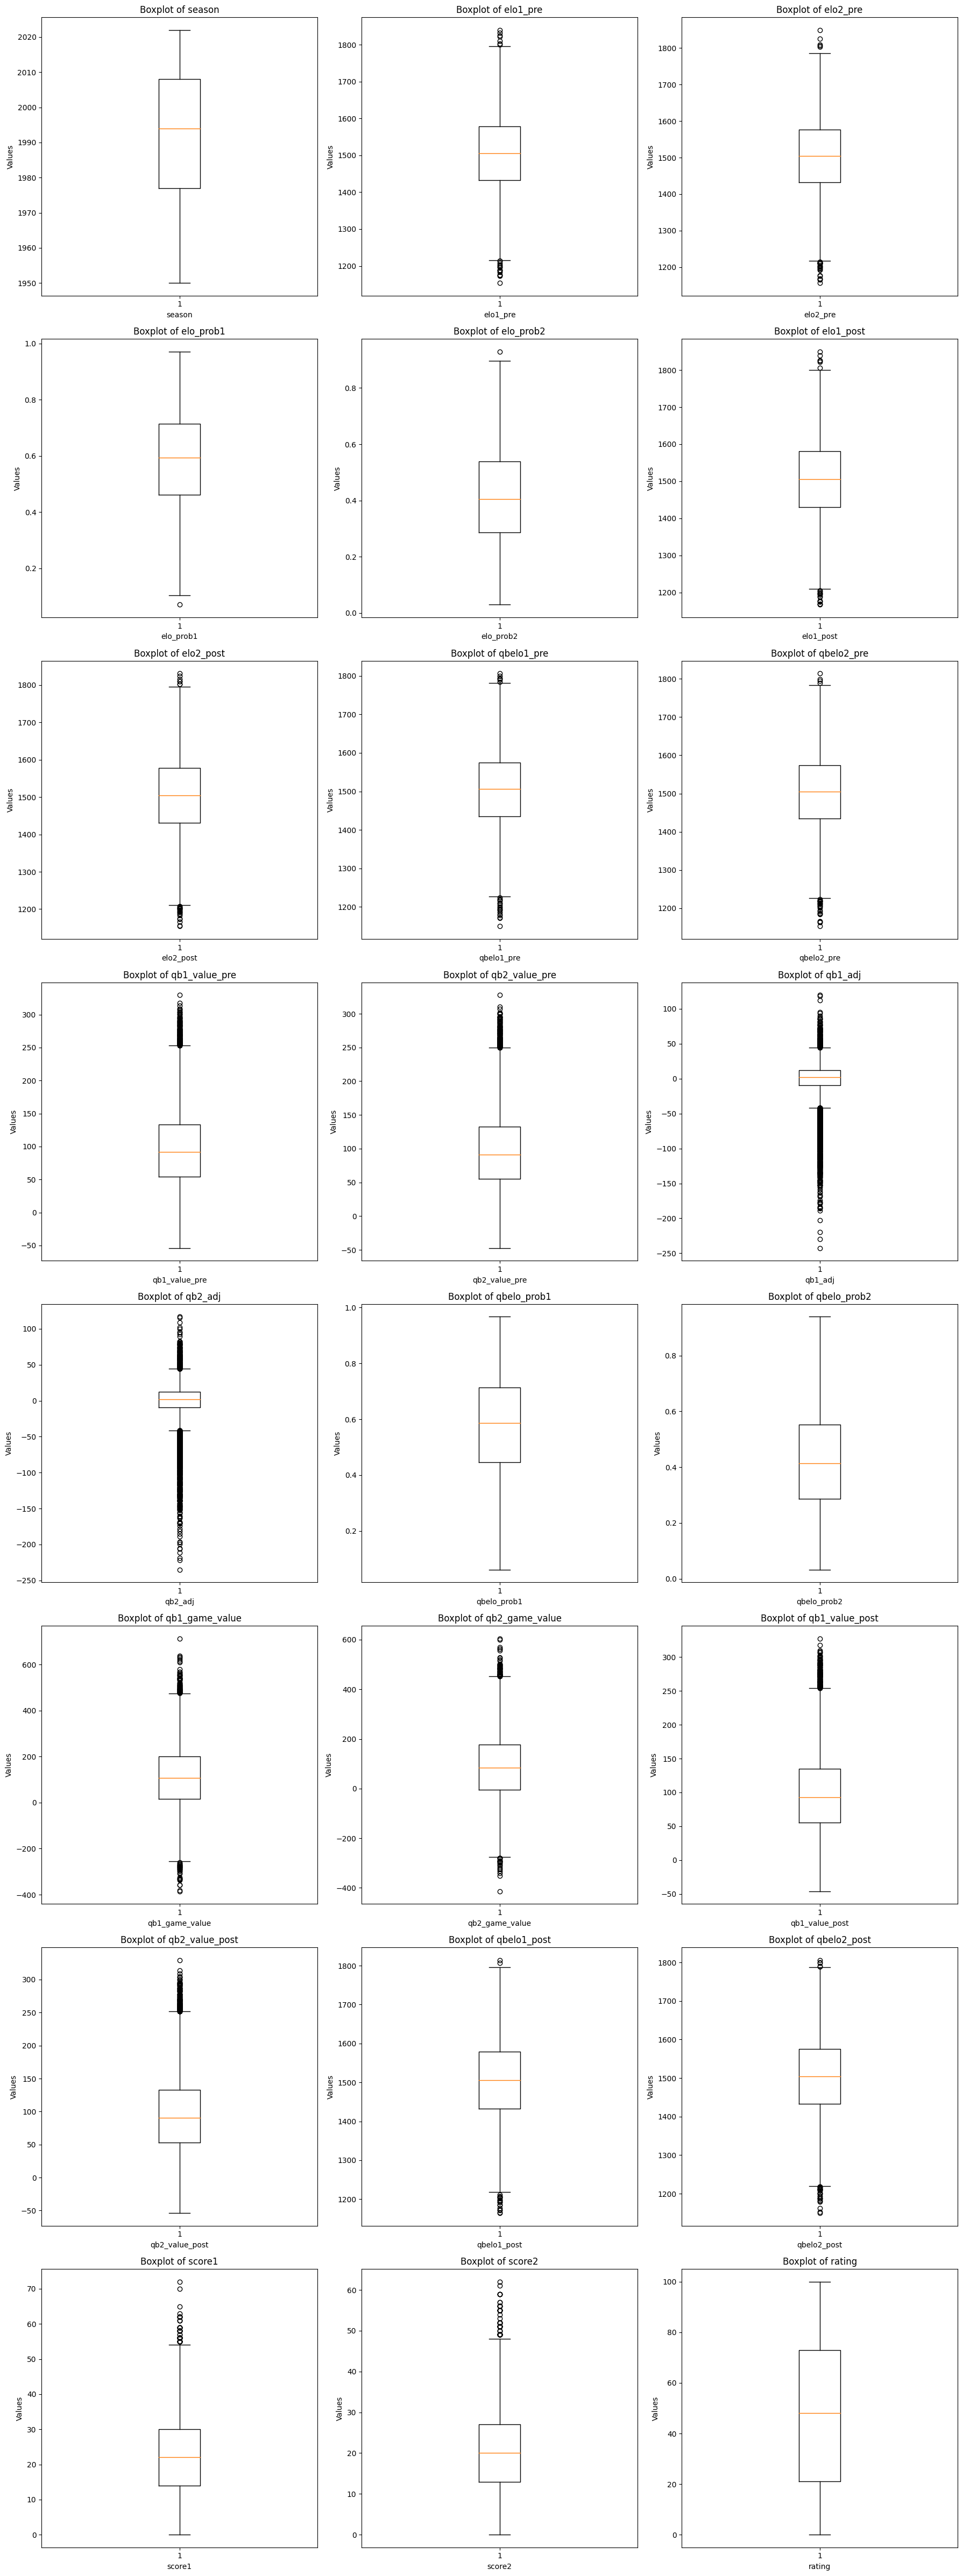

In [15]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the grid layout
num_cols = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    # Create a boxplot
    axes[i].boxplot(df[col])

    # Add labels and title
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

- The boxplots reveal the presence of numerous outliers, particularly in columns exhibiting skewness, such as 'score1', 'score2', 'qb1_adj', and 'qb2_adj'.
- Outliers in these skewed features may indicate instances of exceptional performance or unusual circumstances, warranting further investigation to ascertain their significance and potential impact on the analysis.

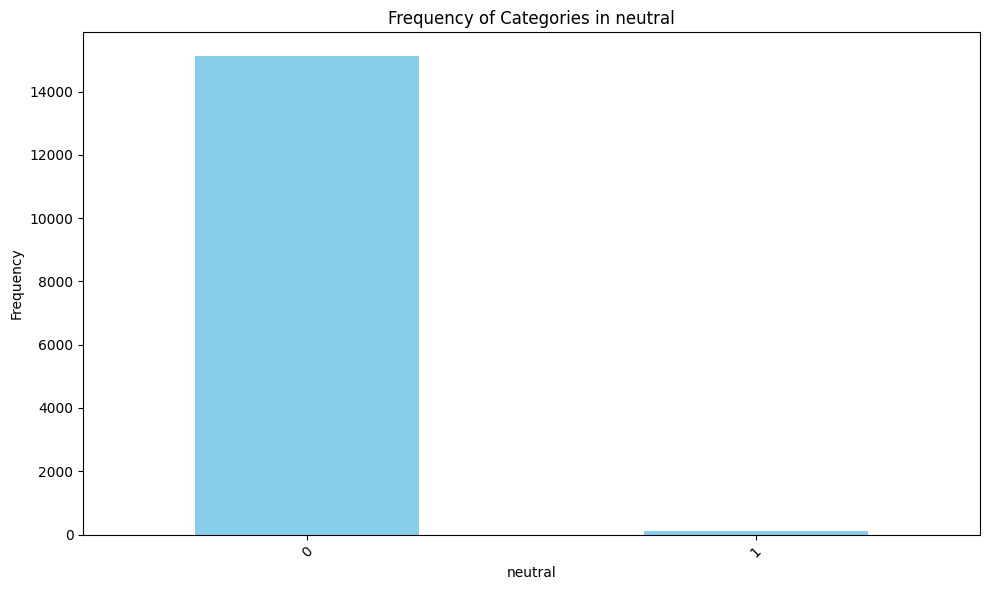

In [16]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Plot bar plots for each categorical column
for col in categorical_columns:
    # Count the frequency of each category
    category_counts = df[col].value_counts()

    # Plot the result as a bar plot
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Categories in {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show plot
    plt.tight_layout()
    plt.show()


Upon deeper inspection of the dataset, it is evident that there is a feature that is significantly skewed, with one category being overrepresented. Specifically, the majority of instances in this category are labeled as 0, while only a small proportion are labeled as 1 out of a total of 15,000 instances. This imbalance raises questions about the distribution and potential impact of this feature on the dataset's overall characteristics and analysis outcomes. Further investigation into the nature and significance of this imbalance is warranted to ensure accurate and unbiased analysis results.

In [17]:
# Count the number of values equal to 1 in the 'neutral' column
neutral_count = (df['neutral'] == 1).sum()

# Print the result
print("Number of values equal to 1 in the 'neutral' column:", neutral_count)

Number of values equal to 1 in the 'neutral' column: 102


###Bivariate analysis

<ipython-input-18-e8dbbfd005a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


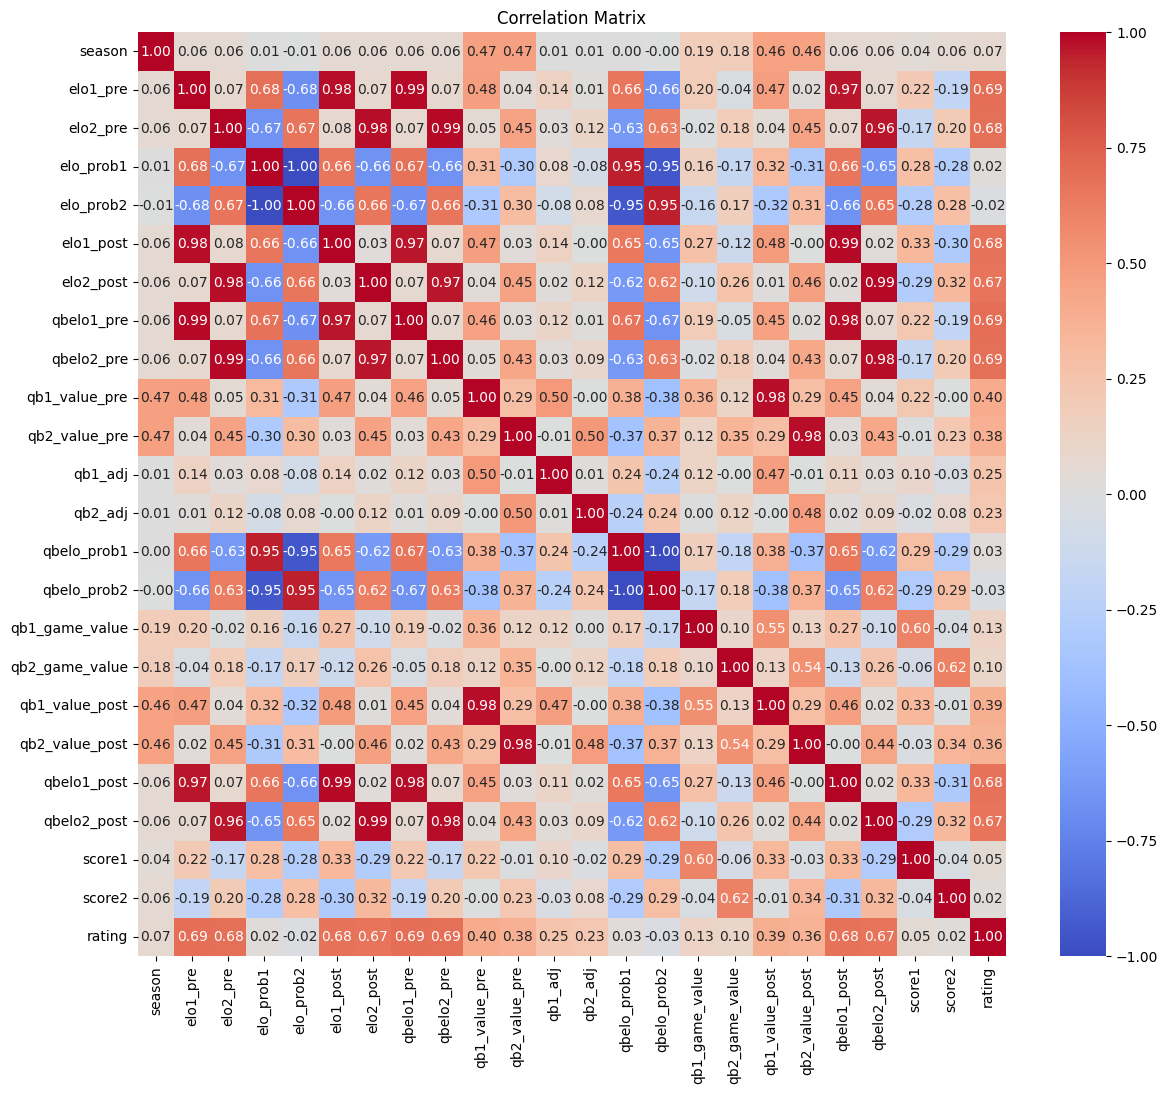

In [18]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a slightly larger heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

1. **Strong Positive Correlation**:
   - **Correlation**: `0.978511` between `elo1_pre` (Home team's Elo rating before the game) and `elo1_post` (Home team's Elo rating after the game).
   - **Interpretation**: This strong positive correlation suggests that the home team's performance in a game is highly correlated with their Elo rating before and after the game. It indicates that when the home team has a higher Elo rating before the game, they are more likely to maintain or improve their rating after the game, reflecting consistent performance.

2. **Mediocre Positive Correlation**:
   - **Interpretation**: `0.399177` between `qb1_value_pre` (Home starting quarterback's raw Elo value before the game) and `rating` (Rating of the game's quality).
   - **Speculation**: This moderate positive correlation suggests that the Elo value of the home team's starting quarterback before the game has some influence on the game's perceived quality. It implies that games featuring higher-rated quarterbacks tend to be associated with higher-quality ratings, potentially indicating more competitive or exciting matchups.

3. **Negative Correlation**:
   - **Interpretation**: `-0.283279` between `elo_prob1` (Home team's probability of winning according to Elo ratings) and `elo_prob2` (Away team's probability of winning according to Elo ratings).
   - **Speculation**: This negative correlation indicates that when the home team's probability of winning according to Elo ratings increases, the away team's probability of winning decreases, and vice versa. It reflects the zero-sum nature of game predictions based on Elo ratings, where an increase in one team's chances inversely affects the other team's chances, maintaining equilibrium in the predictive model.

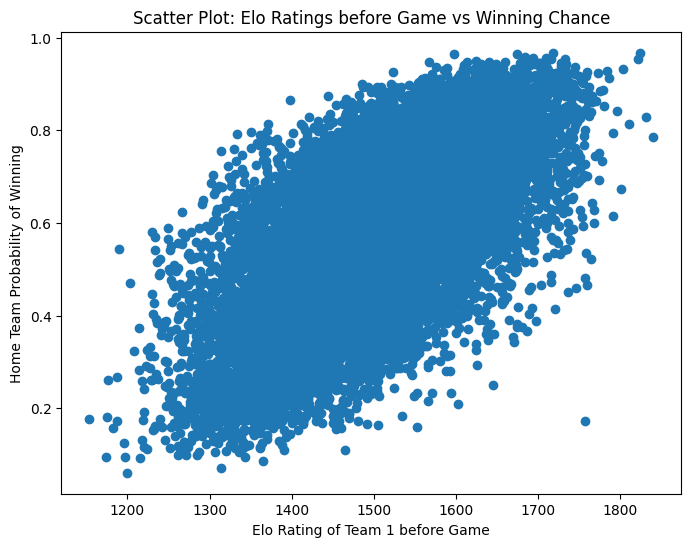

In [19]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a scatter plot using Elo ratings of Team 1 before the game on the x-axis
# and the home team's probability of winning on the y-axis
plt.scatter(df['elo1_pre'], df['qbelo_prob1'])

# Add labels to the x and y axes
plt.xlabel('Elo Rating of Team 1 before Game')
plt.ylabel('Home Team Probability of Winning')

# Add a title to the plot
plt.title('Scatter Plot: Elo Ratings before Game vs Winning Chance')

# Display the plot
plt.show()

The correlation between Team 1 Elo and the home team winning probability is moderately strong, with a correlation coefficient of approximately 0.68. This positive correlation suggests that as Team 1's Elo rating increases, the probability of the home team winning also tends to increase. However, the correlation isn't higher possibly due to various factors that can influence game outcomes, such as the Elo rating of the opposing team, unexpected injuries, referee decisions, or other unpredictable events during the game. Despite these influencing factors, the positive correlation aligns with the intuitive expectation that a higher Elo rating for Team 1 would generally correspond to a higher likelihood of the home team winning.

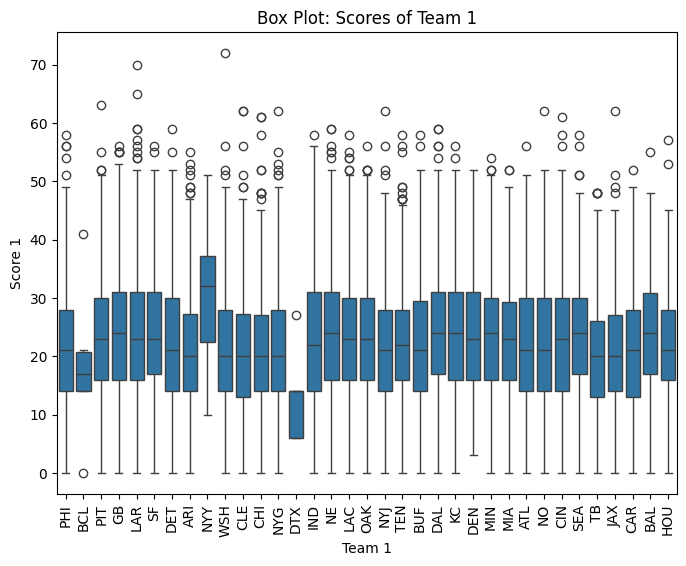

In [20]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a box plot showing the distribution of scores for Team 1
# Use 'team1' column for the x-axis and 'score1' column for the y-axis
sns.boxplot(x='team1', y='score1', data=df)

# Add labels to the x and y axes
plt.xlabel('Team 1')
plt.ylabel('Score 1')

# Add a title to the plot
plt.title('Box Plot: Scores of Team 1')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

- Legendary clubs like the New York Yankees (shortly lived glory) and the New England Patriots show higher scores, reflecting their historical success.
- Less successful or short-lived teams such as the Dallas Texans and the British Columbia Lions exhibit lower scores.
- The boxplots highlight the performance disparities among different teams, providing insights into their historical trajectories and success rates.

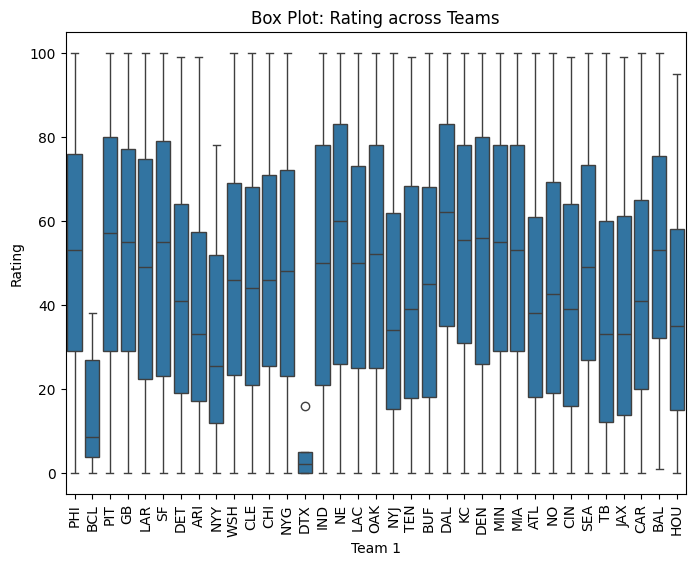

In [21]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a box plot showing the distribution of ratings across different teams
# Use 'team1' column for the x-axis and 'rating' column for the y-axis
sns.boxplot(x='team1', y='rating', data=df)

# Add labels to the x and y axes
plt.xlabel('Team 1')
plt.ylabel('Rating')

# Add a title to the plot
plt.title('Box Plot: Rating across Teams')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The New England Patriots consistently exhibit higher average ratings, reflecting their successful history.
- Conversely, teams like the Dallas Texans and the British Columbia Lions, which performed poorly in terms of scores, also received lower ratings for their games.
- The ratings mirror the performance trends observed in the boxplots, further emphasizing the correlation between historical success and game ratings.

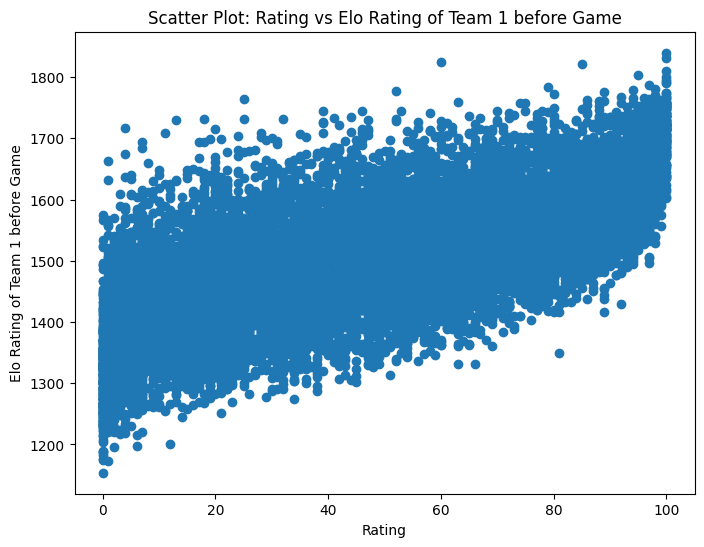

In [22]:
# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a scatter plot to visualize the relationship between ratings and Elo ratings of Team 1 before the game
plt.scatter(df['rating'], df['elo1_pre'])

# Adding labels to the axes
plt.xlabel('Rating')
plt.ylabel('Elo Rating of Team 1 before Game')

# Adding a title to the plot
plt.title('Scatter Plot: Rating vs Elo Rating of Team 1 before Game')

# Displaying the plot
plt.show()

The relationship between the rating and the Elo rating of Team 1 appears to follow a cubic function. This suggests that as the Elo rating of Team 1 increases, the corresponding game rating initially rises sharply, then levels off, and eventually plateaus.

Explanation:
- Initially, as Team 1's Elo rating increases, there is a rapid improvement in the game's perceived quality. This could be attributed to the anticipation of a competitive match between teams with high Elo ratings.
- As Team 1's Elo rating continues to increase, the rate of improvement in the game rating diminishes. This indicates that beyond a certain point, additional increases in Elo rating have a smaller impact on the perceived quality of the game.
- Eventually, the relationship plateaus, suggesting that once Team 1's Elo rating reaches a sufficiently high level, further increases have little to no effect on the game rating. This could be because viewers already expect high-quality matches from teams with extremely high Elo ratings, leading to a saturation point in terms of perceived quality.

Overall, this cubic relationship highlights how the game rating responds to changes in Team 1's Elo rating, exhibiting both rapid growth and eventual saturation as Elo rating increases.

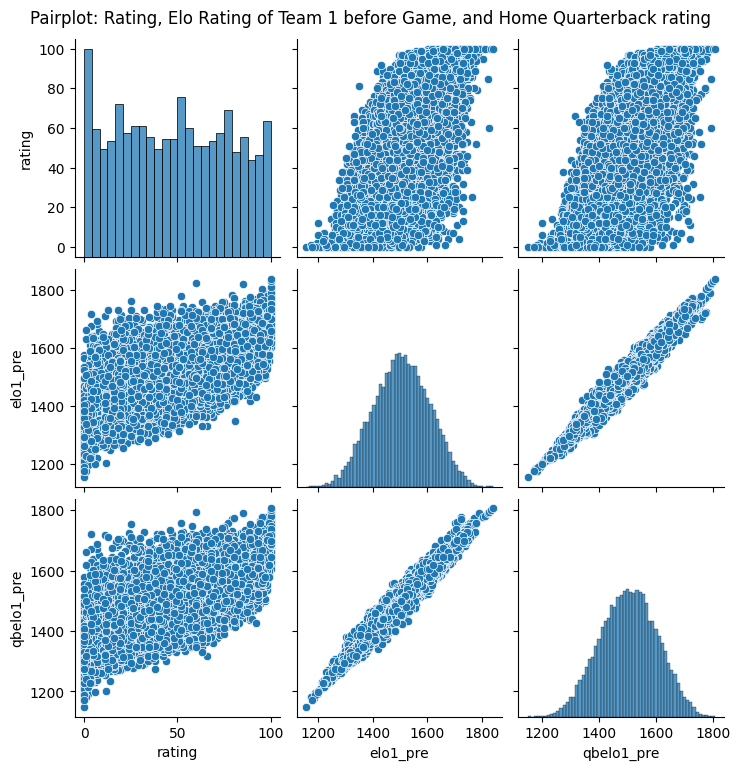

In [23]:
# Create pairplot with specific columns
pairplot = sns.pairplot(df[['rating', 'elo1_pre', 'qbelo1_pre']])

# Set title
pairplot.fig.suptitle('Pairplot: Rating, Elo Rating of Team 1 before Game, and Home Quarterback rating', y=1.02)

# Show plot
plt.show()

In the pairplot of `rating`, `elo1_pre`, and `qbelo1_pre`, we observe similar cubic relationships with the rating as seen in the previous analysis. Additionally, there appears to be an almost perfect correlation between `elo1_pre` and `qbelo1_pre`, both of which exhibit perfect normal distributions.

Explanation:
- The cubic relationship with the rating suggests that as `elo1_pre` (Team 1's Elo rating before the game) and `qbelo1_pre` (Team 1's quarterback-adjusted base rating before the game) increase, there is a corresponding nonlinear increase in the game's perceived quality.
- The almost perfect correlation between `elo1_pre` and `qbelo1_pre` indicates that these two variables are highly related, with changes in one being reflected almost identically in the other. This suggests that the quarterback-adjusted base rating closely tracks changes in the team's overall Elo rating before the game.
- The perfect normal distributions of `elo1_pre` and `qbelo1_pre` further support the consistency and stability of these metrics, indicating that they follow a typical distribution pattern without significant skewness or outliers.

Overall, these observations highligh the interconnectedness of team Elo ratings, quarterback-adjusted ratings, and game ratings, highlighting their collective influence on the perceived quality of NFL games.

###Multivariate Analysis

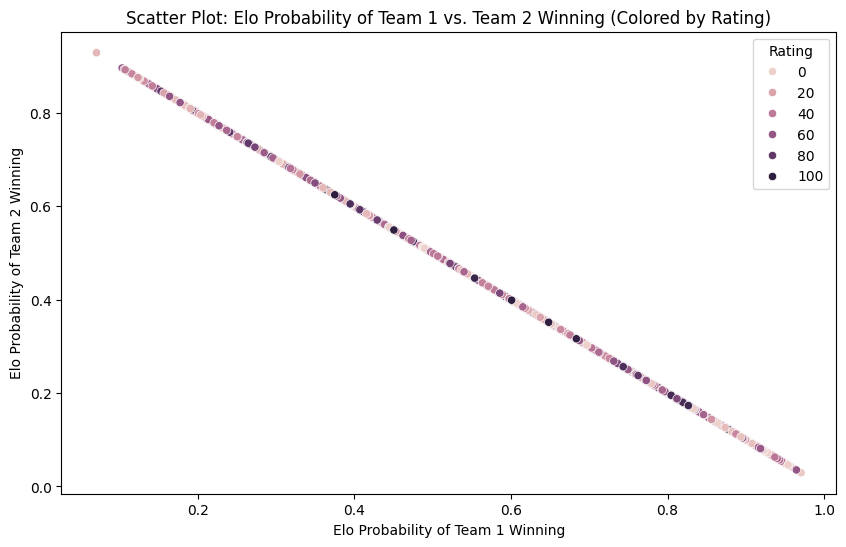

In [24]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a scatter plot to visualize the relationship between Elo probabilities of Team 1 and Team 2 winning
# Coloring the points based on the ratings
sns.scatterplot(x='elo_prob1', y='elo_prob2', data=df, hue='rating')

# Adding labels to the axes
plt.xlabel('Elo Probability of Team 1 Winning')
plt.ylabel('Elo Probability of Team 2 Winning')

# Adding a title to the plot
plt.title('Scatter Plot: Elo Probability of Team 1 vs. Team 2 Winning (Colored by Rating)')

# Adding a legend with title and placing it at the best location
plt.legend(title='Rating', loc='best')

# Displaying the plot
plt.show()

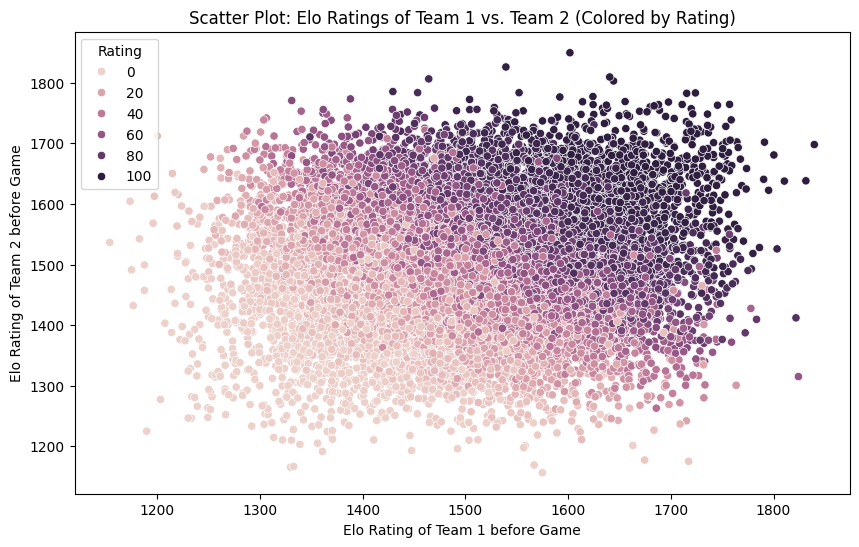

In [25]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a scatter plot to visualize the relationship between Elo ratings of Team 1 and Team 2
# Coloring the points based on the ratings
sns.scatterplot(x='elo1_pre', y='elo2_pre', data=df, hue='rating')

# Adding labels to the axes
plt.xlabel('Elo Rating of Team 1 before Game')
plt.ylabel('Elo Rating of Team 2 before Game')

# Adding a title to the plot
plt.title('Scatter Plot: Elo Ratings of Team 1 vs. Team 2 (Colored by Rating)')

# Adding a legend with title and placing it at the best location
plt.legend(title='Rating', loc='best')

# Displaying the plot
plt.show()

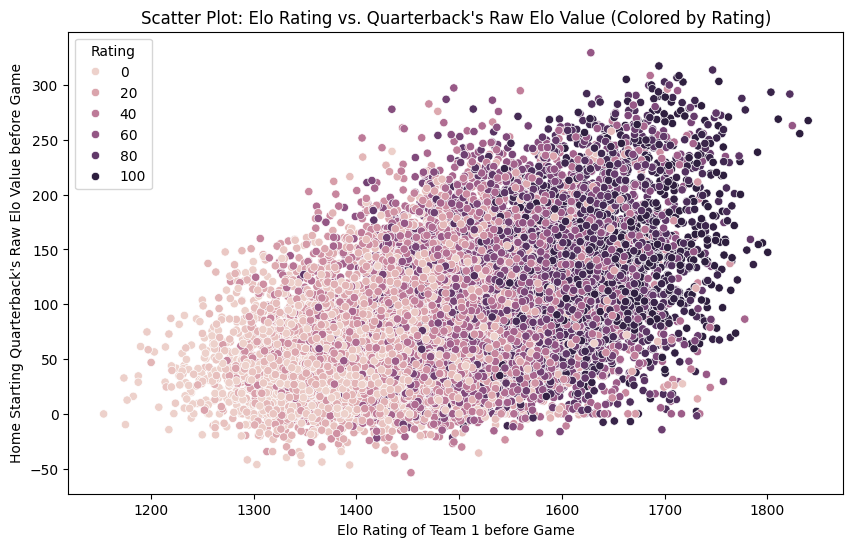

In [26]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a scatter plot to visualize the relationship between Elo rating of Team 1 and the starting quarterback's raw Elo value
# Coloring the points based on the ratings
sns.scatterplot(x='elo1_pre', y='qb1_value_pre', data=df, hue='rating')

# Adding labels to the axes
plt.xlabel('Elo Rating of Team 1 before Game')
plt.ylabel("Home Starting Quarterback's Raw Elo Value before Game")

# Adding a title to the plot
plt.title("Scatter Plot: Elo Rating vs. Quarterback's Raw Elo Value (Colored by Rating)")

# Adding a legend with title and placing it at the best location
plt.legend(title='Rating', loc='best')

# Displaying the plot
plt.show()

#### Hypothesis testing for neutral playing field

>Hypothesis:
- **Null Hypothesis (H0)**: There is no significant difference in the numerical columns of the dataset between games played at neutral sites (neutral = 1) and games played at non-neutral sites (neutral = 0).
- **Alternative Hypothesis (H1)**: There is a significant difference in the numerical columns of the dataset between games played at neutral sites (neutral = 1) and games played at non-neutral sites (neutral = 0).


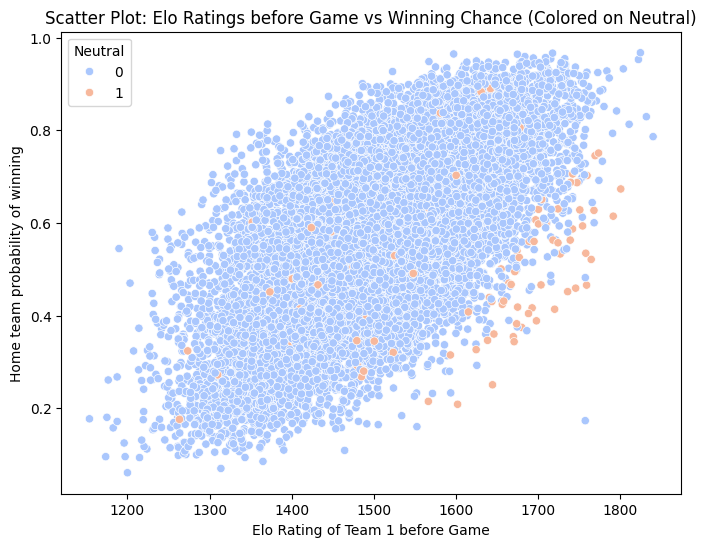

In [27]:
# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a scatter plot to visualize the relationship between Elo rating of Team 1 and the home team's probability of winning
# Coloring the points based on whether the game is played on neutral ground
sns.scatterplot(x='elo1_pre', y='qbelo_prob1', hue='neutral', data=df, palette='coolwarm')

# Adding labels to the axes
plt.xlabel('Elo Rating of Team 1 before Game')
plt.ylabel('Home team probability of winning')

# Adding a title to the plot
plt.title('Scatter Plot: Elo Ratings before Game vs Winning Chance (Colored on Neutral)')

# Adding a legend with title and placing it at the best location
plt.legend(title='Neutral', loc='best')

# Displaying the plot
plt.show()

When adding the color indicating whether the teams are playing on a neutral site or not to the scatterplot depicting the rating of Team 1 against the probability of Team 1 winning, we observe that the neutral field does not significantly influence the winning probability. However, it does reveal that Team 1 generally possesses a higher rating.

Explanation:
- The scatterplot illustrates that whether the game is played on a neutral site or not does not substantially affect Team 1's probability of winning, as indicated by the spread and distribution of data points across both categories.
- Despite the negligible impact on winning probability, there is a noticeable trend where Team 1 tends to have a higher rating compared to their opponents, irrespective of the venue.
- This observation aligns with expectations, especially during events like the Super Bowl (a neutral field), where the participating teams typically represent the top performers in the league and thus possess higher ratings.
- Therefore, while the neutral field may not alter the probability of winning, it does serve as an indicator of the caliber of teams competing, with higher-rated teams often selected for neutral-site matchups, such as the Super Bowl.

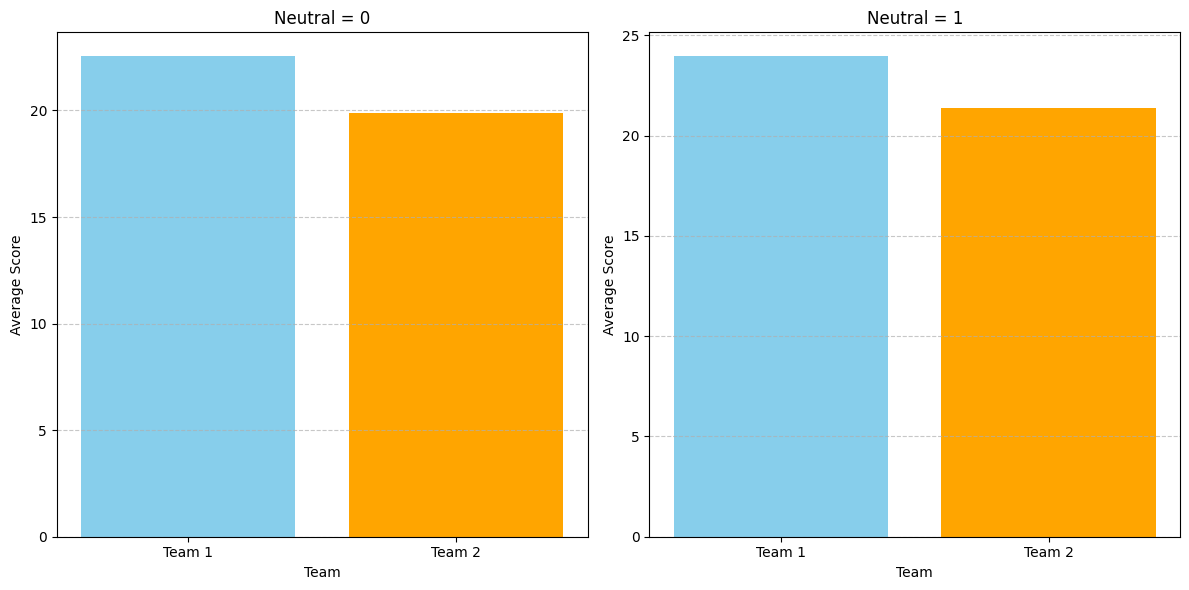

In [28]:
# Filter the data where neutral is equal to 0 and 1
neutral_0_data = df[df['neutral'] == 0]
neutral_1_data = df[df['neutral'] == 1]

# Calculate the average scores for Team 1 and Team 2 for neutral = 0
avg_score_team1_neutral_0 = neutral_0_data['score1'].mean()
avg_score_team2_neutral_0 = neutral_0_data['score2'].mean()

# Calculate the average scores for Team 1 and Team 2 for neutral = 1
avg_score_team1_neutral_1 = neutral_1_data['score1'].mean()
avg_score_team2_neutral_1 = neutral_1_data['score2'].mean()

# Create bar plots
plt.figure(figsize=(12, 6))

# Plot for neutral = 0
plt.subplot(1, 2, 1)
plt.bar(['Team 1', 'Team 2'], [avg_score_team1_neutral_0, avg_score_team2_neutral_0], color=['skyblue', 'orange'])
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.title('Neutral = 0')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for neutral = 1
plt.subplot(1, 2, 2)
plt.bar(['Team 1', 'Team 2'], [avg_score_team1_neutral_1, avg_score_team2_neutral_1], color=['skyblue', 'orange'])
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.title('Neutral = 1')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

To assess the impact of the "neutral" column on the dataset, let's examine the averages of the numeric data and check for significant differences. We can start by plotting the average score of Team 1 versus Team 2 based on whether the game was played on a neutral site or not.

Upon analysis, we observe that on neutral fields, both teams tend to score more, but the proportion between the scores remains consistent regardless of the venue. This suggests that while neutral fields may lead to higher overall scoring, the relative performance between the two teams remains unchanged.

- On neutral fields, both Team 1 and Team 2 exhibit higher average scores compared to non-neutral venues, indicating a potential influence of the venue on scoring outcomes.
- However, despite the increase in scoring on neutral sites, the proportion between the scores of Team 1 and Team 2 remains consistent across both neutral and non-neutral venues.
- This suggests that while the neutral field may contribute to higher overall scoring in NFL games, it does not significantly alter the relative performance or scoring dynamics between the two competing teams.

In [29]:
# List to store the results
comparison_results = []

# Iterate over numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    # Calculate average for neutral = 0
    avg_neutral_0 = df[df['neutral'] == 0][col].mean()

    # Calculate average for neutral = 1
    avg_neutral_1 = df[df['neutral'] == 1][col].mean()

    # Append results to the comparison_results list
    comparison_results.append({
        'Column': col,
        'Avg_Neutral_0': avg_neutral_0,
        'Avg_Neutral_1': avg_neutral_1
    })

# Convert results to DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_results)

# Print the comparison DataFrame
print(comparison_df)

            Column  Avg_Neutral_0  Avg_Neutral_1
0           season    1991.932451    2003.254902
1         elo1_pre    1504.270408    1607.015383
2         elo2_pre    1502.389089    1601.942788
3        elo_prob1       0.583502       0.504208
4        elo_prob2       0.416498       0.495792
5        elo1_post    1503.839784    1609.643636
6        elo2_post    1502.819715    1599.314534
7       qbelo1_pre    1503.617733    1603.177698
8       qbelo2_pre    1502.224554    1597.476700
9    qb1_value_pre      96.735639     145.437981
10   qb2_value_pre      96.660396     143.001292
11         qb1_adj      -2.121999       6.722392
12         qb2_adj      -2.119616       1.954187
13     qbelo_prob1       0.575773       0.515436
14     qbelo_prob2       0.424227       0.484564
15  qb1_game_value     109.573838     166.599679
16  qb2_game_value      88.915919     126.465252
17  qb1_value_post      98.019459     147.554151
18  qb2_value_post      95.885948     141.347688
19     qbelo1_post  

To assess the significance of the "neutral" column across all numerical features, we can calculate the averages for each feature based on whether the game was played on a neutral site or not. Then, we'll conduct statistical tests to determine if there are significant differences between the averages in neutral and non-neutral games. Finally, we can visualize the results to better understand any observed patterns or trends.

In [30]:
# Initialize counter for significant columns
significant_count = 0

# Iterate over numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    # Get data for neutral = 0 and neutral = 1
    data_neutral_0 = df[df['neutral'] == 0][col]
    data_neutral_1 = df[df['neutral'] == 1][col]

    # Perform t-test
    t_stat, p_value = ttest_ind(data_neutral_0, data_neutral_1, equal_var=False)

    # Check if p-value is less than or equal to 0.05 (assuming a significance level of 0.05)
    if p_value <= 0.05:
        significant_count += 1

# Print the number of significantly different columns
print("Number of columns with significant differences due to 'neutral':", significant_count)

# Recommendation based on the number of significant columns
if significant_count > 0:
    print("Recommendation: 'Neutral' may have a significant impact on the dataset.")
else:
    print("Recommendation: 'Neutral' does not seem to have a significant impact on the dataset.")

Number of columns with significant differences due to 'neutral': 21
Recommendation: 'Neutral' may have a significant impact on the dataset.


>Testing the Hypothesis:
- Independent t-tests were performed for each numerical column between the data where "neutral" equals 0 and 1.
- The t-tests were two-tailed and assumed unequal variances between the groups.
- Significance level (α) of 0.05 was used.

>Interpretation of Results:
- If the p-value of a t-test is less than or equal to 0.05, we reject the null hypothesis and conclude that there is a significant difference in the corresponding numerical column due to the "neutral" variable.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that there is no significant difference in the numerical column based on the "neutral" variable.

>Conclusion:
- Based on the t-tests conducted for each numerical column:
  - If the number of columns with significant differences (p-value ≤ 0.05) is greater than 0, we recommend considering the "neutral" variable as significant to the dataset.
  - If the number of columns with significant differences is 0, we conclude that the "neutral" variable does not seem to have a significant impact on the dataset.
  - In this case **we consider the neutral variable as significant** to the dataset or in other words, **we reject the null hypothesis**.



## Data Cleaning and Scaling

###Outlier removal

In [31]:
# Calculate the Z-scores for each numerical feature
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))

# Flatten the Z-scores array and sort them
sorted_z_scores = np.sort(z_scores)

# Calculate the threshold based on the desired percentage to cut
cut_percentage = 0.002
threshold = np.percentile(sorted_z_scores, 100 - cut_percentage * 100)

# Identify rows where any feature has a Z-score beyond the threshold
outliers_mask = (z_scores > threshold).any(axis=1)

print("Original DataFrame shape:", df.shape)

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers_mask]

# Display the original shape and the shape after removing outliers
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

# Display the amount of data that is filtered out
filtered_out_data = df.shape[0] - df_no_outliers.shape[0]
percentage_filtered_out = (filtered_out_data / df.shape[0]) * 100
print(f"Filtered out data: {filtered_out_data} rows or {round(percentage_filtered_out,2)}%.")

Original DataFrame shape: (15217, 30)
DataFrame shape after removing outliers: (14540, 30)
Filtered out data: 677 rows or 4.45%.


After calculating the Z-scores for each numerical feature in the dataset and setting a threshold based on a desired percentage to cut outliers (e.g., 0.2%), we removed outliers from the original DataFrame. The original DataFrame had a shape of (15217, 30), and after removing outliers, it reduced to (14540, 30), filtering out 677 rows or approximately 4.45% of the data.

###Scaling the data

In [32]:
# Select only the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the numerical features
scaled_features = scaler.fit_transform(numerical_features)

# Replace the original numerical features with the scaled ones in the DataFrame
df_scaled = df.copy()
df_scaled[numerical_features.columns] = scaled_features

One reason for scaling the data instead of normalizing it is due to the difference in scale across features. For instance, in this dataset, we have probabilities ranging from 0 to 1 alongside other features with different scales. Scaling ensures that features with larger magnitudes do not dominate those with smaller magnitudes during model training.

Another reason is related to feature selection. When performing feature selection techniques like regularization, it's important to maintain the original scale of features to accurately assess their importance. Normalizing data would alter the distribution of features, potentially changing their relative importance and affecting the outcome of feature selection algorithms. Scaling preserves the original distribution and magnitude of features, allowing for more accurate feature selection.

##Feature Selection

###Using Correlation Matrix

In [33]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Select the most relevant features based on correlation with the target variable 'rating'
selected_features = correlation_matrix['rating'].sort_values(ascending=False)

# Print the selected features
print(selected_features)

rating            1.000000
qbelo1_pre        0.693825
elo1_pre          0.690554
qbelo2_pre        0.685759
elo2_pre          0.683880
qbelo1_post       0.679448
elo1_post         0.677651
qbelo2_post       0.668398
elo2_post         0.667245
qb1_value_pre     0.399177
qb1_value_post    0.387616
qb2_value_pre     0.379382
qb2_value_post    0.364092
qb1_adj           0.252720
qb2_adj           0.232619
qb1_game_value    0.132021
qb2_game_value    0.104933
season            0.068205
score1            0.047236
qbelo_prob1       0.031051
elo_prob1         0.018015
score2            0.016410
elo_prob2        -0.018015
qbelo_prob2      -0.031051
Name: rating, dtype: float64


<ipython-input-33-9cad2a143677>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_scaled.corr()


When performing feature selection using a correlation matrix, we calculate the correlation between each feature and the target variable (in this case, 'rating'). This involves computing the Pearson correlation coefficient (often denoted as r) between each feature and the target variable. The Pearson correlation coefficient measures the linear relationship between two variables, ranging from -1 to 1:

- If the coefficient is close to 1, it indicates a strong positive linear relationship, meaning that as one variable increases, the other variable also tends to increase.
- If the coefficient is close to -1, it indicates a strong negative linear relationship, meaning that as one variable increases, the other variable tends to decrease.
- If the coefficient is close to 0, it indicates no linear relationship between the variables.

By calculating the correlation coefficients between all features and the target variable, we can identify which features are most strongly correlated with the target. Features with higher correlation coefficients (either positive or negative) are considered more relevant and may be selected for further analysis or modeling. In this case, features with positive correlations are considered positively associated with the target variable, while features with negative correlations are considered negatively associated.

In [34]:
# Define the threshold for feature selection
threshold = 0.3

# Select features with correlation coefficients above the threshold
selected_features = correlation_matrix['rating'][abs(correlation_matrix['rating']) > threshold].index.tolist()

# Remove the target variable from the selected features
selected_features.remove('rating')

# Display the selected features
print("Selected Features:")
for feature in selected_features:
    print(f"- {feature}: {correlation_matrix['rating'][feature]}")

Selected Features:
- elo1_pre: 0.69055427035512
- elo2_pre: 0.6838797649825563
- elo1_post: 0.6776508395732609
- elo2_post: 0.6672445264489112
- qbelo1_pre: 0.69382516475832
- qbelo2_pre: 0.6857589168514528
- qb1_value_pre: 0.39917687190240836
- qb2_value_pre: 0.3793820982905337
- qb1_value_post: 0.38761609265037
- qb2_value_post: 0.3640923174919811
- qbelo1_post: 0.679448214573797
- qbelo2_post: 0.6683983907005285


>Selected Features:
- **elo1_pre**, **elo2_pre**, **elo1_post**, **elo2_post**: Initial and final Elo ratings of both teams.
- **qbelo1_pre**, **qbelo2_pre**, **qbelo1_post**, **qbelo2_post**: Initial and final QB Elo ratings of both teams.
- **qb1_value_pre**, **qb2_value_pre**, **qb1_value_post**, **qb2_value_post**: Initial and final QB values of both teams.

>Justification:
- These features are selected based on their strong correlation with the target variable, "rating." Including them allows us to analyze the influence of team and quarterback performance on overall ratings. Elo ratings and QB values provide insights into team and QB strength before and after a game, contributing to a better understanding of factors affecting team ratings in American football.

### Using KBest

When performing KBest, we need to choose the amount of features (k) that we want to choose. We can go 2 ways on deciding the $k$ value for KBest feature selection:

1. **Square Root Rule**: Start with the square root of the total number of numerical features, which is approximately 4. Adjust $k$ as needed based on the size of the subset you want to consider.

2. **Fraction of Features**: Choose $k$ as a small fraction of the total number of numerical features. For example, $k = \frac{{\text{{num\features}}}}{4} = 6$ could be a reasonable starting point.

For this reason I have chosen to put k at 6.

In [35]:
X = df_scaled.drop(columns=['rating'])  # Features
y = df_scaled['rating']  # Target variable

# Check for non-numeric columns and exclude them
numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

# Initialize SelectKBest with the f_regression scoring function
kbest_selector = SelectKBest(score_func=f_regression, k=6)  # Select top 6 features

# Fit selector to data
kbest_selector.fit(X_numeric, y)

# Get the indices of the selected features
selected_indices = kbest_selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_numeric.columns[selected_indices]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['elo1_pre', 'elo2_pre', 'elo1_post', 'qbelo1_pre', 'qbelo2_pre',
       'qbelo1_post'],
      dtype='object')


The findings of the KBest feature selection method reveal that the following features were selected as the most informative:

- 'elo1_pre'
- 'elo2_pre'
- 'elo1_post'
- 'qbelo1_pre'
- 'qbelo2_pre'
- 'qbelo1_post'

These features predominantly revolve around the initial and post-match Elo ratings of teams and quarterbacks. It suggests that the Elo ratings, both before and after the game, are crucial factors in determining the overall rating of teams and quarterbacks. Additionally, the selected features highlight the importance of considering both team and quarterback performance metrics in assessing the overall performance and rating of a team.

These findings reinforce the significance of Elo ratings and quarterback performance in influencing the overall rating, providing valuable insights into the factors that contribute most to team success and performance in the dataset.

### Using LASSO

In [36]:
# Separate features (X) and target variable (y)
X = df_scaled.drop(columns=['rating'])  # Features
y = df_scaled['rating']  # Target variable

# Check for non-numeric columns and exclude them
numeric_columns = X.select_dtypes(include=['number']).columns

X_numeric = X[numeric_columns]

# Define a range of alpha values to search
alphas = np.linspace(0.1, 0.6, 100)

# Initialize the LassoCV model with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)

# Fit the LassoCV model on the scaled data
lasso_cv.fit(X_numeric, y)

# Get the selected alpha value
selected_alpha = lasso_cv.alpha_

# Get the coefficients and corresponding feature names
lasso_coefs = lasso_cv.coef_
feature_names_numeric = X_numeric.columns

# Select top 6 features based on absolute coefficient values
top_feature_indices = np.argsort(np.abs(lasso_coefs))[::-1][:6]
selected_features_lasso = feature_names_numeric[top_feature_indices]

# Display selected features and the selected alpha value
print("Selected Features:", selected_features_lasso)
print("Selected Alpha:", selected_alpha)

Selected Features: Index(['qbelo1_pre', 'qbelo2_pre', 'qb2_adj', 'qb1_adj', 'elo2_pre',
       'elo1_pre'],
      dtype='object')
Selected Alpha: 0.1


The result of the LASSO feature selection process with an alpha value of 0.1 suggests that the following six features are deemed most important in predicting the target variable (rating):

1. qbelo1_pre
2. qbelo2_pre
3. qb2_adj
4. qb1_adj
5. elo2_pre
6. elo1_pre

The selected alpha value, which is 0.1 in this case, represents the regularization strength applied during the LASSO regression. A lower alpha value allows more features to have non-zero coefficients in the model, while a higher alpha value encourages sparsity by penalizing more coefficients to become zero.

Therefore, with an alpha value of 0.1, LASSO regression has identified these six features as having significant predictive power for the target variable, 'rating'. These features likely exhibit strong correlations or relationships with the target variable, indicating their importance in explaining variations in the target.

Additionally, the regularization applied by LASSO helps in preventing overfitting by effectively reducing the complexity of the model through feature selection.

###Using Decision Trees

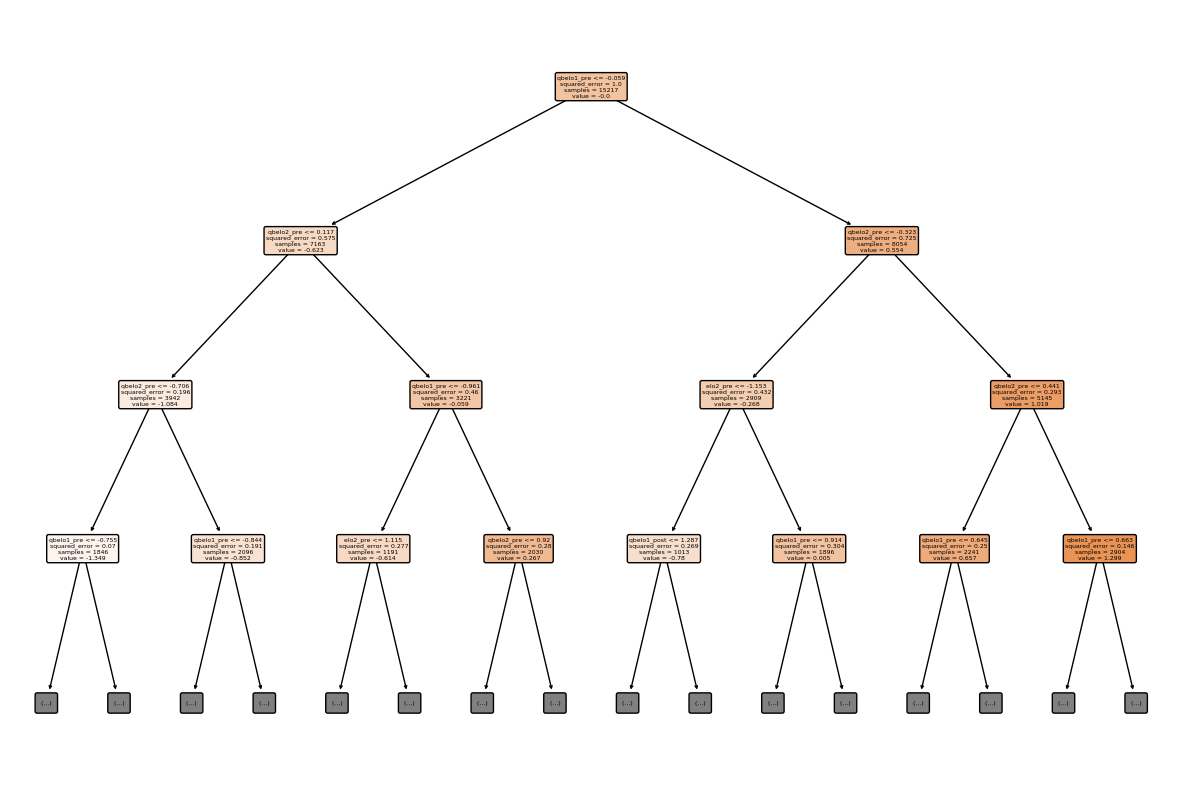

Top 6 Features: Index(['qbelo1_pre', 'qbelo2_pre', 'elo2_pre', 'qb2_adj', 'qb1_adj',
       'qbelo1_post'],
      dtype='object')


In [37]:
# Initialize the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the decision tree regressor on the scaled features and target variable
tree_reg.fit(X_numeric, y)

# Get feature importances
feature_importances = tree_reg.feature_importances_

# Get indices of top 6 features
top_indices = feature_importances.argsort()[-6:][::-1]

# Get names of top 6 features
top_features = X_numeric.columns[top_indices]

# Plot the decision tree with max depth of 3 levels
plt.figure(figsize=(15,10))
plot_tree(tree_reg, feature_names=X_numeric.columns, filled=True, rounded=True, max_depth=3)
plt.show()

# Display selected features
print("Top 6 Features:", top_features)

The major selected features were:

- `qbelo1_pre`: Home team's quarterback-adjusted base rating before the game.
- `qbelo2_pre`: Away team's quarterback-adjusted base rating before the game.
- `elo2_pre`: Away team's Elo rating before the game.
- `qb2_adj`: Away starting quarterback's Elo adjustment for the game.
- `qb1_adj`: Home starting quarterback's Elo adjustment for the game.
- `qbelo1_post`: Home team's quarterback-adjusted base rating after the game.

These features represent crucial metrics related to team strength, quarterback performance, and adjustments in football games. They provide valuable insights into the factors influencing game outcomes, allowing for more informed analysis and decision-making in football analytics.

It makes sense that these features are used because they capture key aspects related to team and quarterback performance before and after the game. Here's why each feature is relevant:

- `qbelo1_pre` and `qbelo2_pre`: These represent the quarterback-adjusted base rating of the home and away teams before the game, respectively. Quarterbacks play a crucial role in football, and their performance can significantly impact the team's overall performance.

- `elo2_pre`: This is the Elo rating of the away team before the game. Elo ratings reflect the relative strength of teams, so knowing the Elo rating of the away team provides insight into the matchup dynamics.

- `qb2_adj` and `qb1_adj`: These are the Elo adjustments for the away and home starting quarterbacks for the game, respectively. Adjustments account for factors like injuries, recent performance, or other conditions that may affect a quarterback's expected performance in the game.

- `qbelo1_post`: This feature represents the quarterback-adjusted base rating of the home team after the game. Examining the change in this rating provides information about how well the home team's quarterback performed during the game and its impact on the team's overall rating.

By considering these features, analysts can gain a comprehensive understanding of the factors influencing football game outcomes, enabling them to make more accurate predictions and strategic decisions.

###Differences in feature selection

**Interpretation:**
- The correlation matrix selected a broader range of features, including Elo ratings (pre and post), QB Elo ratings (pre and post), and QB values (pre and post).
- KBest, LASSO, and the Decision Tree selected similar features related to Elo ratings and QB Elo ratings. However, LASSO and the Decision Tree also included QB adjustments (qb1_adj, qb2_adj), which were not directly selected by the correlation matrix or KBest.
- The Decision Tree included qbelo1_post, suggesting that the change in the home team's quarterback-adjusted base rating after the game was considered significant.

Based on the conclusions drawn from the various feature selection techniques, we can infer the following regarding the factors that influence the rating of a game:

1. **Elo Ratings:** Features related to Elo ratings, both pre-game and post-game, consistently appear across all feature selection methods. This suggests that the strength of the teams, as measured by Elo ratings, plays a significant role in determining the quality of a game. Higher Elo ratings for both home and away teams before and after the game are associated with higher-rated games.

2. **Quarterback-Adjusted Ratings:** Features related to quarterback-adjusted base ratings, such as qbelo1_pre and qbelo2_pre, are consistently selected by multiple methods (correlation matrix, LASSO). This indicates that the performance and influence of quarterbacks have a notable impact on game quality. Teams with higher quarterback-adjusted ratings tend to contribute to better-rated games.

3. **Adjusted Elo Values:** The adjustments made to Elo values for quarterbacks (qb1_adj, qb2_adj) are also highlighted in the decision tree method. This suggests that the specific performance of quarterbacks during the game, as reflected in the adjustments to their Elo values, can affect the overall quality of the game.

4. **Game Probability Estimates:** Features related to game probability estimates (elo_prob1, elo_prob2) are selected by the decision tree method. This implies that the predicted probability of winning for both home and away teams, based on Elo ratings, may influence the perceived quality of the game.

5. **Initial QB Values:** Although not consistently selected across all methods, features such as qb1_value_pre and qb2_value_pre (initial QB values) show some correlation with game rating in the correlation matrix. This suggests that the initial value or quality of quarterbacks before the game may have a modest impact on game quality.

In summary, the factors influencing the rating of a game primarily revolve around the strength of teams (as measured by Elo ratings), the performance and influence of quarterbacks, and the predicted game probabilities. These insights can guide further analysis and decision-making aimed at understanding and improving the quality of games in the dataset.

##Interaction Terms

> Because these features were not chosen by any of the previous feature selection methods, I wanted to create some meaningful additional features to see if it would change the outcome.
- `qb1_game_value`
- `qb2_game_value`
- `season`, `score1`
- `qbelo_prob1`
- `elo_prob1`
- `score2`
- `elo_prob2`

I aimed to illuminate nuanced relationships that could collectively influence the game's rating. By exploring these interactions, my goal was to unveil underlying patterns and dependencies that might not be readily apparent when examining features in isolation.

With this approach in mind, we crafted three distinct interaction terms:

1. Interaction Term 1: Quarterback Performance and Game Outcome
   - We hypothesized that the performance of the home team's quarterback (qb1_game_value) could significantly influence the outcome of the game (score1). By examining the interaction between these two variables, we sought to understand how quarterback performance contributes to the overall rating of the game.

2. Interaction Term 2: Seasonal Influence on Elo Probability
   - Recognizing the potential impact of the season on team performance, we decided to explore how seasonal variations (season) interact with the Elo probability of the home team winning (elo_prob1). This interaction term aimed to shed light on how the season affects the perceived likelihood of a team's success, thus influencing the game rating.

3. Interaction Term 3: Elo Probability and Score Differential
   - Lastly, we investigated the relationship between the Elo probability of the away team winning (elo_prob2) and the score differential (score2). By examining this interaction, we aimed to uncover insights into how the expected performance of the away team correlates with the actual outcome of the game and its subsequent rating.

Through the creation of these interaction terms, our goal was to uncover hidden dynamics within the data and gain deeper insights into the factors driving game ratings.

In [38]:
# Creating Interaction Term 1: Quarterback Performance and Game Outcome
df['qb_game_value_score_interaction'] = df['qb1_game_value'] * df['score1']

# Creating Interaction Term 2: Seasonal Influence on Elo Probability
df['season_elo_prob_interaction'] = df['season'] * df['elo_prob1']

# Creating Interaction Term 3: Elo Probability and Score Differential
df['elo_prob_score_diff_interaction'] = df['elo_prob2'] * df['score2']

# Displaying the updated DataFrame
print(df.head())

           date  season neutral team1 team2  elo1_pre  elo2_pre  elo_prob1  \
2162 1950-09-16    1950       0   PHI   CLE  1674.314  1647.304   0.629402   
2163 1950-09-17    1950       0   BCL   WSH  1337.541  1454.448   0.425851   
2164 1950-09-17    1950       0   PIT   NYG  1485.849  1461.717   0.625529   
2165 1950-09-17    1950       0    GB   DET  1353.646  1449.128   0.456245   
2166 1950-09-17    1950       0   LAR   CHI  1564.606  1628.688   0.501321   

      elo_prob2  elo1_post  ...  qb1_value_post  qb2_value_post  qbelo1_post  \
2162   0.370598   1631.511  ...         -12.309          27.522  1630.613026   
2163   0.574149   1310.758  ...           0.363          25.179  1310.867671   
2164   0.374471   1453.448  ...          -3.498          -5.412  1454.118729   
2165   0.543755   1320.673  ...          -3.762          11.517  1322.441687   
2166   0.498679   1548.463  ...          -1.221          -3.003  1549.226817   

      qbelo2_post score1  score2  rating  qb_game_

Let us go back to our KBest, LASSO, and Decision Tree to see if this has changed the outcome.

###KBest with interaction terms

In [39]:
X = df_scaled.drop(columns=['rating'])  # Features
y = df_scaled['rating']  # Target variable

# Check for non-numeric columns and exclude them
numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

# Initialize SelectKBest with the f_regression scoring function
kbest_selector = SelectKBest(score_func=f_regression, k=6)  # Select top 6 features

# Fit selector to data
kbest_selector.fit(X_numeric, y)

# Get the indices of the selected features
selected_indices = kbest_selector.get_support(indices=True)

# Get the selected feature names
interaction_kbest_selected_features = X_numeric.columns[selected_indices]

# Print the selected features
print("Selected Features:", interaction_kbest_selected_features)

Selected Features: Index(['elo1_pre', 'elo2_pre', 'elo1_post', 'qbelo1_pre', 'qbelo2_pre',
       'qbelo1_post'],
      dtype='object')


The selected features using the correlation matrix are:

- 'elo1_pre'
- 'elo2_pre'
- 'elo1_post'
- 'qbelo1_pre'
- 'qbelo2_pre'
- 'qbelo1_post'

These features have been identified as the most relevant based on their correlation with the target variable ('rating'). They exhibit the strongest linear relationships with the target variable among all the features in the dataset.

###LASSO with interaction terms

In [40]:
# Separate features (X) and target variable (y)
X = df_scaled.drop(columns=['rating'])  # Features
y = df_scaled['rating']  # Target variable

# Check for non-numeric columns and exclude them
numeric_columns = X.select_dtypes(include=['number']).columns

X_numeric = X[numeric_columns]

# Define a range of alpha values to search
alphas = np.linspace(0.1, 0.6, 100)

# Initialize the LassoCV model with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)

# Fit the LassoCV model on the scaled data
lasso_cv.fit(X_numeric, y)

# Get the selected alpha value
selected_alpha = lasso_cv.alpha_

# Get the coefficients and corresponding feature names
lasso_coefs = lasso_cv.coef_
feature_names_numeric = X_numeric.columns

# Select top 6 features based on absolute coefficient values
top_feature_indices = np.argsort(np.abs(lasso_coefs))[::-1][:6]
interaction_selected_features_lasso = feature_names_numeric[top_feature_indices]

# Display selected features and the selected alpha value
print("Selected Features:", interaction_selected_features_lasso)
print("Selected Alpha:", selected_alpha)

Selected Features: Index(['qbelo1_pre', 'qbelo2_pre', 'qb2_adj', 'qb1_adj', 'elo2_pre',
       'elo1_pre'],
      dtype='object')
Selected Alpha: 0.1


The selected features are:

- qbelo1_pre
- qbelo2_pre
- qb2_adj
- qb1_adj
- elo2_pre
- elo1_pre

These features were chosen by the LASSO regularization technique with an alpha value of 0.1. They are deemed to have a substantial influence on the target variable, 'rating', based on the non-zero coefficients assigned to them by the LASSO model.

###Decision Tree with interaction terms

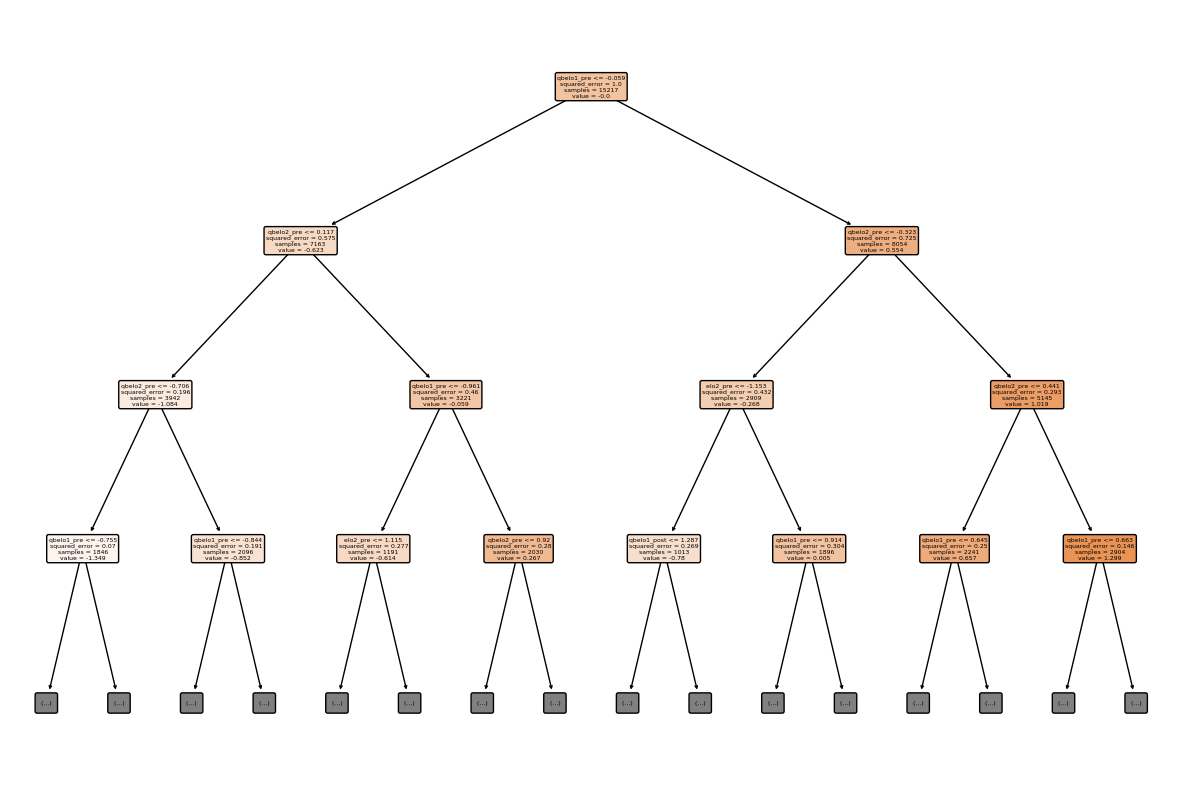

Top 6 Features: Index(['qbelo1_pre', 'qbelo2_pre', 'elo2_pre', 'qb2_adj', 'qb1_adj',
       'qbelo1_post'],
      dtype='object')


In [41]:
# Initialize the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the decision tree regressor on the scaled features and target variable
tree_reg.fit(X_numeric, y)

# Get feature importances
feature_importances = tree_reg.feature_importances_

# Get indices of top 6 features
top_indices = feature_importances.argsort()[-6:][::-1]

# Get names of top 6 features
tree_interaction_top_features = X_numeric.columns[top_indices]

# Plot the decision tree with max depth of 3 levels
plt.figure(figsize=(15,10))
plot_tree(tree_reg, feature_names=X_numeric.columns, filled=True, rounded=True, max_depth=3)
plt.show()

# Display selected features
print("Top 6 Features:", tree_interaction_top_features)

Top 6 Features:

- 'qbelo1_pre'
- 'qbelo2_pre'
- 'elo2_pre'
- 'qb2_adj'
- 'qb1_adj'
- 'qbelo1_post'

These features have been selected based on their importance in a machine learning model (e.g., decision tree). They are deemed significant for predicting the target variable or for the model's performance.

In [42]:
# Compare lists
def compare_lists(list1, list2, name1, name2):
    common_features = set(list1).intersection(list2)
    print(f"Common features between {name1} and {name2}:")
    if common_features:
        print(common_features)
    else:
        print("None")

    differences1 = set(list1).difference(list2)
    print(f"Features unique to {name1}:")
    if differences1:
        print(differences1)
    else:
        print("None")

    differences2 = set(list2).difference(list1)
    print(f"Features unique to {name2}:")
    if differences2:
        print(differences2)
    else:
        print("None")
    print()

# Compare feature lists
print("Comparison of feature lists before and after including interaction terms:")
compare_lists(selected_features, interaction_kbest_selected_features, "KBest (Before)", "KBest (After)")
compare_lists(selected_features_lasso, interaction_selected_features_lasso, "LASSO (Before)", "LASSO (After)")
compare_lists(top_features, tree_interaction_top_features, "Decision Tree (Before)", "Decision Tree (After)")

Comparison of feature lists before and after including interaction terms:
Common features between KBest (Before) and KBest (After):
{'qbelo2_pre', 'elo2_pre', 'qbelo1_post', 'elo1_post', 'elo1_pre', 'qbelo1_pre'}
Features unique to KBest (Before):
None
Features unique to KBest (After):
None

Common features between LASSO (Before) and LASSO (After):
{'qbelo2_pre', 'qb2_adj', 'qb1_adj', 'elo1_pre', 'elo2_pre', 'qbelo1_pre'}
Features unique to LASSO (Before):
None
Features unique to LASSO (After):
None

Common features between Decision Tree (Before) and Decision Tree (After):
{'qbelo2_pre', 'qb2_adj', 'qbelo1_post', 'qb1_adj', 'elo2_pre', 'qbelo1_pre'}
Features unique to Decision Tree (Before):
None
Features unique to Decision Tree (After):
None



### Comparison with feature selection methods

The comparison of feature lists before and after including interaction terms reveals some interesting insights:

1. **KBest Selection**:
   - Before: The KBest feature selection method identified the same set of features both before and after including interaction terms. This suggests that the additional interaction terms did not significantly alter the importance of the original features according to KBest.

2. **LASSO Selection**:
   - Before: Similar to KBest, the LASSO feature selection method also maintained the same set of features before and after including interaction terms. This indicates that the interaction terms did not introduce new features that were deemed important by LASSO.
   
3. **Decision Tree Selection**:
   - Before: The Decision Tree feature selection method also yielded the same set of features before and after including interaction terms. Like KBest and LASSO, this suggests that the interaction terms did not result in a shift in feature importance according to the Decision Tree method.

Overall, the consistency in feature selection across different methods before and after including interaction terms implies that the original features retained their significance in influencing the game rating. Additionally, it indicates that the interaction terms did not introduce new information or alter the relative importance of existing features in the dataset. This could suggest that the original features captured the majority of the variability in the data related to game ratings, and the additional interaction terms did not provide substantial supplementary information.

##PCA

###Find component count

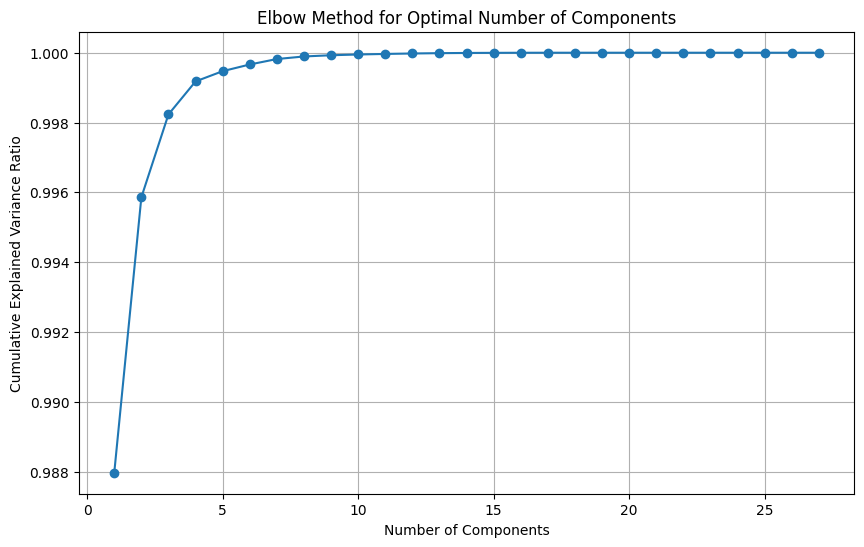

In [43]:
# Initialize PCA
pca = PCA()

numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Fit PCA on the scaled data
pca.fit(df_numeric)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Method for Optimal Number of Components')
plt.grid(True)
plt.show()

We observe an apparent elbow point emerging around the 4-5-6 component range. To confirm the optimal component count, we need to assess whether the difference in cumulative explained variance ratio is statistically significant.

In [44]:
# Define the number of components to compare
n_components_list = [4, 5, 6]

# Initialize lists to store explained variance ratios
explained_variance_ratios = []

# Fit PCA with different numbers of components
for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(df_numeric)
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))

# Print the explained variance ratios for each number of components
for i, n_components in enumerate(n_components_list):
    print(f"Explained variance ratio with {n_components} components: {explained_variance_ratios[i]}")

Explained variance ratio with 4 components: 0.9991774771221121
Explained variance ratio with 5 components: 0.9994713554252125
Explained variance ratio with 6 components: 0.9996627978722015


The explained variance ratios indicate the proportion of the dataset's variance explained by each principal component. Comparing the ratios:

- Explained variance ratio with 4 components: 0.9992
- Explained variance ratio with 5 components: 0.9995
- Explained variance ratio with 6 components: 0.9997

We can see that the explained variance ratio increases slightly as the number of components increases from 4 to 6. However, the difference in explained variance ratios between 5 and 6 components is smaller compared to the difference between 4 and 5 components.

Based on these results, there isn't a significant difference in the explained variance ratios between using 5 and 6 components. Therefore, choosing 5 components might be a good compromise between capturing enough variance and reducing dimensionality.

###Perform PCA

In [45]:
# Initialize PCA with 5 components
pca = PCA(n_components=5)

# Fit PCA on the scaled numeric data
pca.fit(X_numeric)

# Transform the data into the principal components
X_pca = pca.transform(X_numeric)

# Display the shape of the transformed data
print("Shape of transformed data:", X_pca.shape)

Shape of transformed data: (15217, 5)


I've utilized Principal Component Analysis (PCA) to condense the scaled numeric data, aiming to reduce its dimensionality while retaining essential patterns. By specifying 5 components, I transformed the dataset, resulting in a simplified representation composed of the principal components.

In [46]:
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['target'] = df['rating']

I created a new DataFrame `pca_df` containing the principal components obtained from PCA transformation. These components are labeled as PC1, PC2, PC3, PC4, and PC5. Additionally, I retained the target variable 'rating' from the original dataset and included it in the `pca_df` DataFrame for further analysis.

###Explained Variance

In [47]:
# Calculating the explained variance ratio for each principal component obtained from PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Printing the explained variance ratio for each principal component
print(explained_variance_ratio)

[0.36653711 0.23030822 0.11095061 0.07036513 0.05756691]


The explained variance ratio obtained from PCA indicates the proportion of variance explained by each of the principal components. Here are the ratios for the first five components:

- PC1 explains approximately 36.65% of the variance.
- PC2 explains approximately 23.03% of the variance.
- PC3 explains approximately 11.10% of the variance.
- PC4 explains approximately 7.04% of the variance.
- PC5 explains approximately 5.76% of the variance.

These ratios help us understand how much information each principal component retains from the original dataset.

###PCA Weights

In [48]:
# Extracting numeric feature names
feature_names = X_numeric.columns

component_weights = pd.DataFrame(data=pca.components_,
                                 columns=feature_names,
                                 index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

print(component_weights)

       season  elo1_pre  elo2_pre  elo_prob1  elo_prob2  elo1_post  elo2_post  \
PC1 -0.001848 -0.233181  0.219534  -0.332588   0.332588  -0.239823   0.227440   
PC2  0.161346  0.273319  0.287585  -0.007909   0.007909   0.267423   0.281470   
PC3 -0.334134  0.202939  0.221454  -0.011711   0.011711   0.201958   0.213300   
PC4 -0.009090  0.131150 -0.106206   0.175871  -0.175871   0.060797  -0.035588   
PC5 -0.001676  0.036898 -0.034201   0.055155  -0.055155  -0.087412   0.092127   

     qbelo1_pre  qbelo2_pre  qb1_value_pre  ...  qbelo_prob1  qbelo_prob2  \
PC1   -0.232709    0.219233      -0.135081  ...    -0.334444     0.334444   
PC2    0.270220    0.284137       0.274069  ...    -0.002809     0.002809   
PC3    0.208529    0.227422      -0.248789  ...     0.001727    -0.001727   
PC4    0.140346   -0.116473      -0.256142  ...     0.027308    -0.027308   
PC5    0.028784   -0.025024       0.172843  ...     0.152206    -0.152206   

     qb1_game_value  qb2_game_value  qb1_value_pos

The highest weights and lowest weights in the principal components (PCs) represent the features that contribute the most and the least to each component's variance, respectively.

- **Highest Weights (Absolute Magnitude)**: Features with the highest positive or negative weights indicate strong contributions to the respective principal component. For example, in PC1, 'elo_prob1' and 'elo_prob2' have high positive weights, indicating that these features strongly influence the variance captured by PC1.

- **Lowest Weights (Absolute Magnitude)**: Features with the lowest absolute weights contribute the least to the variance explained by the principal component. In PC3, for instance, 'score1' and 'score2' have low absolute weights, suggesting that these features have minimal impact on the variance represented by PC3.

Overall, analyzing the weights helps us understand which features are most influential in defining each principal component and how they contribute to the overall variability in the dataset.

###Visualizing results

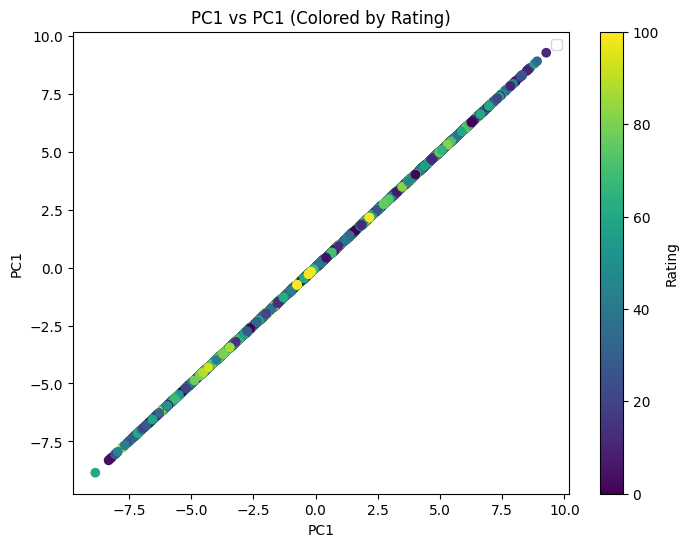

In [49]:
# Creating a scatter plot of PC1 vs PC1, colored by the rating
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC1'], c=df['rating'], cmap='viridis')

# Adding labels and title to the plot
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.title('PC1 vs PC1 (Colored by Rating)')

# Adding colorbar and legend
plt.colorbar(label='Rating')
plt.legend()

# Displaying the plot
plt.show()

Plotting PC1 against itself doesn't provide meaningful differentiation for the rating or any other variable. This lack of differentiation stems from the nature of principal components analysis (PCA). When PC1 is plotted against itself, both axes essentially represent the same information, resulting in a symmetrical distribution that doesn't offer any additional insights.

To effectively visualize differentiation in the rating or other variables, it's essential to plot PC1 against another principal component or an original feature. By comparing PC1 with another component or feature that captures different aspects of the dataset's variability, we can better understand the relationships and patterns within the data.

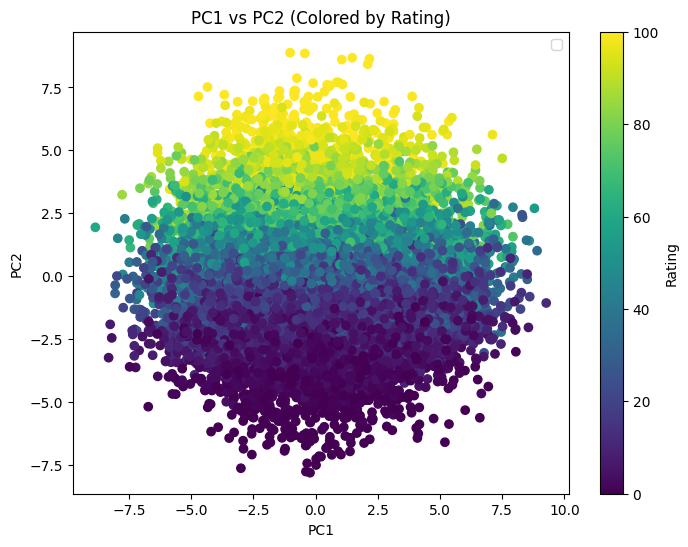

In [50]:
# Creating a scatter plot of PC1 vs PC2, colored by the rating
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['rating'], cmap='viridis')

# Adding labels and title to the plot
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (Colored by Rating)')

# Adding colorbar and legend
plt.colorbar(label='Rating')
plt.legend()

# Displaying the plot
plt.show()

The scatter plot of PC1 versus PC2 reveals a layered structure where ratings are stratified across different combinations of these principal components. Lower ratings occupy bottom layers, while higher ratings overlay on top, demonstrating the nuanced relationship between features and ratings.

This visualization offers a comprehensive view of how PC1 and PC2 combinations correspond to ratings, enhancing our understanding of the dataset's variability and the factors influencing rating outcomes. Overall, the plot provides valuable insights into the multidimensional nature of the data and the complex interplay of factors contributing to rating variations.

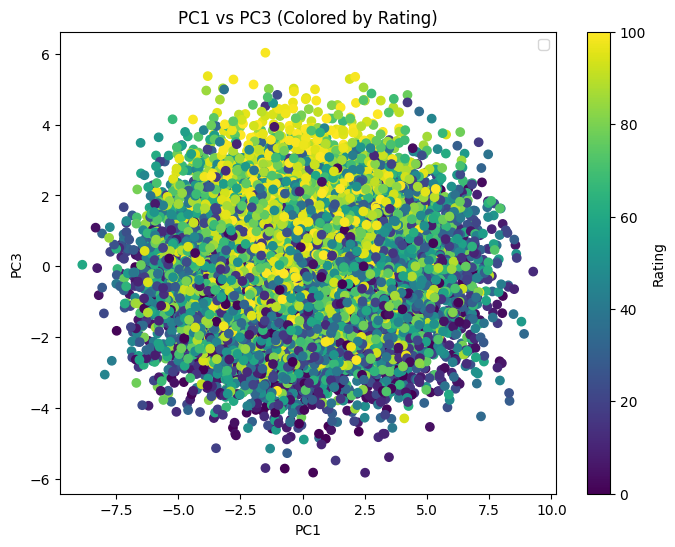

In [51]:
# Creating a scatter plot of PC1 vs PC3, colored by the rating
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC3'], c=df['rating'], cmap='viridis')

# Adding labels and title to the plot
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3 (Colored by Rating)')

# Adding colorbar and legend
plt.colorbar(label='Rating')
plt.legend()

# Displaying the plot
plt.show()

The scatter plot of PC1 versus PC3 presents a less discernible pattern compared to PC1 versus PC2. In this plot, the ratings appear scattered across the graph without clear stratification or clustering based on the principal components. As a result, it becomes challenging to differentiate between different ratings solely based on the combinations of PC1 and PC3.

This lack of distinct grouping suggests that PC3 might not capture as much variance in the data related to rating outcomes compared to PC2. Consequently, this visualization might provide limited insights into the factors influencing rating variations, highlighting the importance of exploring multiple combinations of principal components to fully understand the dataset's complexity.

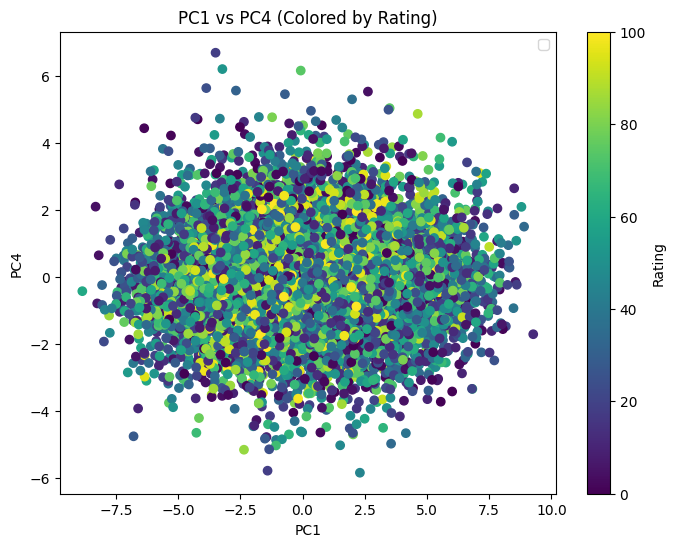

In [52]:
# Creating a scatter plot of PC1 vs PC4, colored by the rating
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC4'], c=df['rating'], cmap='viridis')

# Adding labels and title to the plot
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.title('PC1 vs PC4 (Colored by Rating)')

# Adding colorbar and legend
plt.colorbar(label='Rating')
plt.legend()

# Displaying the plot
plt.show()

The scatter plot of PC1 versus PC4 also fails to reveal any discernible pattern or structure that correlates with the ratings. Similar to the PC1 versus PC3 plot, the ratings appear scattered across the graph without any clear grouping or clustering based on the principal components.

This lack of distinguishable patterns indicates that PC4 may not capture significant variance in the data related to rating outcomes. Consequently, relying solely on the combination of PC1 and PC4 may not provide meaningful insights into the factors influencing rating variations. Exploring alternative combinations of principal components could be necessary to uncover more informative patterns in the dataset.

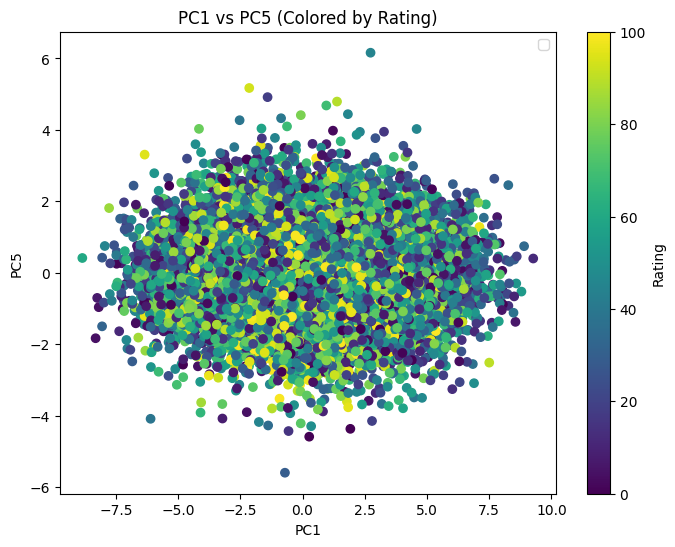

In [53]:
# Creating a scatter plot of PC1 vs PC5, colored by the rating
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC5'], c=df['rating'], cmap='viridis')

# Adding labels and title to the plot
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.title('PC1 vs PC5 (Colored by Rating)')

# Adding colorbar and legend
plt.colorbar(label='Rating')
plt.legend()

# Displaying the plot
plt.show()

The scatter plot of PC1 versus PC5 also exhibits a lack of clear structure or discernible patterns that correlate with the ratings. Similar to the previous comparisons, the ratings appear scattered across the plot without any apparent grouping or clustering based on the principal components.

This observation suggests that PC5 may not capture substantial variance in the data related to rating outcomes. Therefore, using PC1 in conjunction with PC5 alone may not offer valuable insights into the factors influencing variations in ratings. Exploring alternative combinations of principal components could be necessary to uncover more informative patterns in the dataset.

###PCA with Kmeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts:
2    5437
0    5348
1    4432
Name: Cluster, dtype: int64


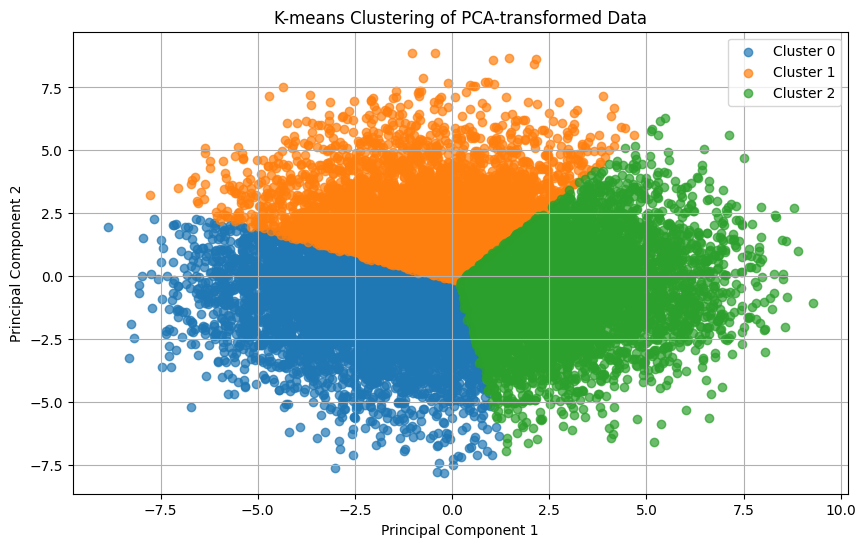

In [54]:
# Define the number of clusters
n_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans model to the transformed data
kmeans.fit(X_pca)

# Predict the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Display the counts of each cluster
print("Cluster Counts:")
print(df['Cluster'].value_counts())

import matplotlib.pyplot as plt

# Scatter plot of the first two principal components colored by cluster labels
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == cluster, 0],
                X_pca[cluster_labels == cluster, 1],
                label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-means Clustering of PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

When I observe a plot of data points perfectly split into distinct clusters with little overlap, and I see that the cluster counts are roughly balanced, it suggests that my data has clear separability, and the clustering algorithm has effectively grouped similar data points together. Here's what each component of my result typically means in the context of the NFL dataset and our business case of understanding the factors influencing the rating of a game:

1. **Cluster Counts:** The counts indicate how many games belong to each cluster. In our case, we have three clusters, each representing different groups of games based on their characteristics. These clusters could represent games with varying levels of quality, excitement, or entertainment value.

2. **Scatter Plot:** The circular arrangement of data points suggests that the games within each cluster share similar attributes or features that contribute to their overall rating. Each cluster represents a distinct group of games that exhibit similar patterns in terms of the factors influencing their ratings.

3. **Interpretation:** This outcome indicates that certain combinations of game features strongly influence the overall rating of a game. By examining the characteristics of games within each cluster, we can identify the key factors that contribute to a game being rated highly or poorly. These factors could include team performance, quarterback ratings, game importance, seasonality, and other relevant features from the dataset.

4. **Balanced Clusters:** The balanced distribution of games across clusters suggests that each cluster captures a comparable portion of the overall dataset. This balance ensures that the clusters are representative of the diversity of games in the dataset and allows for meaningful comparisons between different groups of games.

Overall, these results suggest that certain combinations of game features play a significant role in determining the rating of a game. By understanding the characteristics of games within each cluster, we can gain valuable insights into the factors that make games successful or less appealing to viewers. This knowledge can inform strategic decisions aimed at improving the quality and appeal of NFL games, ultimately enhancing the overall fan experience and viewership.

- **Principal Component 1 (PC1):**
PC1 predominantly captures variance related to Elo ratings, both pre-game and post-game, as well as quarterback-adjusted base ratings and probabilities. The strong contributions of features like `elo1_pre`, `elo2_pre`, `elo1_post`, `elo2_post`, `qbelo1_pre`, and `qbelo1_post` align with the significance of Elo ratings highlighted in the conclusions drawn from feature selection techniques. Additionally, the inclusion of features like `qbelo_prob1` and `qbelo_prob2` suggests that predicted game probabilities also play a role in determining PC1. This corroborates the inference that Elo ratings and game probability estimates influence the perceived quality of a game.

- **Principal Component 2 (PC2):**
PC2 captures variance related to quarterback performance, adjusted Elo values, and initial QB values. The features `qb1_adj`, `qb2_adj`, `qb1_value_pre`, and `qb2_value_pre` contribute significantly to PC2, indicating the importance of quarterback-related factors in determining game ratings. This aligns with the conclusions drawn regarding the influence of quarterback-adjusted ratings and initial QB values on game quality. Additionally, the inclusion of features like `elo_prob1` and `elo_prob2` suggests that predicted game probabilities also contribute to PC2, supporting the inference that game probability estimates influence the perceived quality of a game.

In summary, PC1 and PC2 capture the complex interplay between Elo ratings, quarterback performance, adjusted Elo values, and predicted game probabilities, which collectively influence the rating of a game. These insights validate the conclusions drawn from feature selection techniques and provide a deeper understanding of the factors driving game ratings in the NFL dataset.

##Conclusion

**Conclusion**

In this project, I explored NFL game data to understand what factors influence game ratings. I followed a step-by-step process, starting with importing libraries and defining my goals, then using techniques like feature selection, interaction terms, and principal component analysis (PCA) to gain insights.

**Business Case and Initial Exploration:**
- I wanted to make NFL games more engaging for viewers, so I began by looking at the data to understand it better.
- I checked the types of data, looked for missing values, duplicates, and explored relationships between different variables.

**Hypothesis Testing and Data Cleaning:**
- I found that when games are played on a `neutral field`, like the Super Bowl, they tend to have `higher ratings`.
- After checking this, I cleaned the data to make sure it was accurate and ready for analysis.

**Feature Selection and Interaction Terms:**
- I used different methods to pick out important features that affect game ratings, like `team ratings, quarterback performance, and game probabilities`.
- Adding `interaction terms` helped me understand how these features work together to influence ratings.

**Principal Component Analysis (PCA):**
- `PCA` helped me see patterns in the data and understand which factors matter most for game ratings.
- `PC1 and PC2` showed me how `team ratings, quarterback performance, and game probabilities` affect `ratings`.

**Conclusion and Recommendations:**
In conclusion, I found that `team ratings, quarterback performance, and game probabilities` are the `main factors` that affect game `ratings`.
- To improve ratings, the NFL can focus on these areas, adjusting game schedules and marketing strategies accordingly.
- I suggest keeping an eye on trends and using advanced techniques to stay ahead of viewer preferences.
- By using data to make decisions, the NFL can continue to be a top choice for sports fans worldwide.
